In [40]:
import numpy as np
from numpy import mean, argmax
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_recall_curve, f1_score, auc, precision_score, roc_curve
import time
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

import psutil
import tracemalloc

from matplotlib import pyplot
from matplotlib.pyplot import figure

import platform
import cpuinfo

In [41]:
print(platform.processor())
print(cpuinfo.get_cpu_info()["brand_raw"])
print(psutil.cpu_freq(percpu=True))
print(psutil.cpu_count(logical=False))

Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
[scpufreq(current=2400.0, min=0.0, max=2401.0)]
2


# Adathalmazok

## 2014-2016 (full)

In [42]:
china = pd.read_csv('C:/Users/boont/Desktop/szakdoga/data/china/data.csv')
china = china.drop(['CONS_NO'], axis = 1)
china

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [43]:
#filling NaN
china = china.apply(lambda x: x.fillna(x.mean()),axis=0)
china

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,6.839875,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.75000,17.840000,14.92000
1,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,6.839875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
2,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.32268,11.015589,10.69165
3,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,6.839875,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.82000,19.370000,15.92000
4,1,2.900000,3.420000,3.810000,4.5800,3.56000,4.250000,3.860000,3.530000,3.410000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.14000,18.410000,17.31000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,6.839875,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.64000,3.400000,4.38000
42368,0,2.700000,4.390000,3.950000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.19000,4.570000,4.00000
42369,0,0.580000,0.840000,1.610000,0.9000,0.60000,0.820000,0.890000,0.030000,0.730000,...,8.836129,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.67000,2.440000,1.15000
42370,0,16.890000,13.840000,13.500000,14.6000,14.46000,12.340000,15.370000,17.010000,13.460000,...,21.130000,13.750000,22.610000,18.830000,25.520000,18.110000,19.310000,17.48000,17.200000,15.28000


In [44]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lrc = LogisticRegression(solver='lbfgs')

In [45]:
X_full = china.drop(['FLAG'], axis = 1)
Y_full = china['FLAG']

In [46]:
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(X_full, Y_full, test_size = 0.2, random_state = 42)

### Logistic Regression

In [47]:
start = time.time()
lrc.fit(X_train_full,Y_train_full)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full = lrc.predict(X_test_full)
print(f"Accuracy: {accuracy_score(Y_test_full, lrc_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full, lrc_y_pred_full, average='macro')}")
print(f"Precision: {precision_score(Y_test_full, lrc_y_pred_full, average='macro')}")
print(f"Fscore: {f1_score(Y_test_full, lrc_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full, lrc_y_pred_full))
print(classification_report(Y_test_full, lrc_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full, lrc.predict_proba(X_test_full)[:,1])}")

Training time: 7.6046600341796875sec
Accuracy: 0.9148082595870206
Recall: 0.5511092769518553
Precision: 0.7798189094884389
Fscore: 0.5700781805059671
[[7671   46]
 [ 676   82]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7717
           1       0.64      0.11      0.19       758

    accuracy                           0.91      8475
   macro avg       0.78      0.55      0.57      8475
weighted avg       0.89      0.91      0.89      8475

AUC: 0.6842311444116629


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Random Forest

In [48]:
start = time.time()
rfc.fit(X_train_full,Y_train_full)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full = rfc.predict(X_test_full)
print(f"Accuracy: {accuracy_score(Y_test_full, rfc_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full, rfc_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full, rfc_y_pred_full))
print(classification_report(Y_test_full, rfc_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full, rfc.predict_proba(X_test_full)[:,1])}")

C:\Users\boont\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training time: 13.309408187866211sec
Accuracy: 0.911386430678466
Recall: 0.5587477258685635
[[7626   91]
 [ 660   98]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7717
           1       0.52      0.13      0.21       758

    accuracy                           0.91      8475
   macro avg       0.72      0.56      0.58      8475
weighted avg       0.88      0.91      0.89      8475

AUC: 0.7420169908945844


### XGBoost

In [49]:
start = time.time()
xgb.fit(X_train_full,Y_train_full)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full = xgb.predict(X_test_full)
print(f"Accuracy: {accuracy_score(Y_test_full, xgb_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full, xgb_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full, xgb_y_pred_full))
print(classification_report(Y_test_full, xgb_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full, xgb.predict_proba(X_test_full)[:,1])}")

Training time: 103.63370537757874sec
Accuracy: 0.9171681415929204
Recall: 0.5529999558935605
[[7690   27]
 [ 675   83]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7717
           1       0.75      0.11      0.19       758

    accuracy                           0.92      8475
   macro avg       0.84      0.55      0.57      8475
weighted avg       0.90      0.92      0.89      8475

AUC: 0.804723868045842


Logistic Regression: f1=0.185 auc=0.279
Random Forest: f1=0.207 auc=0.300
XGBoost: f1=0.191 auc=0.405


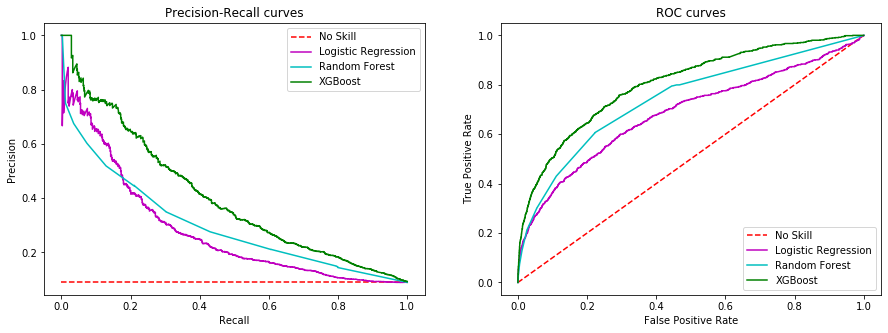

In [50]:
lrc_probs = lrc.predict_proba(X_test_full)
lrc_probs = lrc_probs[:,1]
lrc_precision, lrc_recall, lrc_threshold = precision_recall_curve(Y_test_full, lrc_probs)
lrc_f1, lrc_auc = f1_score(Y_test_full, lrc_y_pred_full), auc(lrc_recall, lrc_precision)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1, lrc_auc))

rfc_probs = rfc.predict_proba(X_test_full)
rfc_probs = rfc_probs[:,1]
rfc_precision, rfc_recall, rfc_threshold = precision_recall_curve(Y_test_full, rfc_probs)
rfc_f1, rfc_auc = f1_score(Y_test_full, rfc_y_pred_full), auc(rfc_recall, rfc_precision)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))

xgb_probs = xgb.predict_proba(X_test_full)
xgb_probs = xgb_probs[:,1]
xgb_precision, xgb_recall, xgb_threshold = precision_recall_curve(Y_test_full, xgb_probs)
xgb_f1, xgb_auc = f1_score(Y_test_full, xgb_y_pred_full), auc(xgb_recall, xgb_precision)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.set_title('Precision-Recall curves')
no_skill = len(Y_test_full[Y_test_full==1]) / len(Y_test_full)
ax1.plot([0, 1], [no_skill, no_skill], linestyle='--', color = 'r', label='No Skill')
ax1.plot(lrc_recall, lrc_precision, color='m', label='Logistic Regression')
ax1.plot(rfc_recall, rfc_precision, color = 'c', label='Random Forest')
ax1.plot(xgb_recall, xgb_precision, color = 'g', label='XGBoost')

ax1.set(xlabel='Recall', ylabel='Precision')
ax1.legend()

lrc_fpr, lrc_tpr, _ = roc_curve(Y_test_full, lrc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(Y_test_full, rfc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test_full, xgb_probs)

ax2.set_title('ROC curves')

ax2.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2.plot(lrc_fpr, lrc_tpr, color='m', label='Logistic Regression')
ax2.plot(rfc_fpr, rfc_tpr, color = 'c', label='Random Forest')
ax2.plot(xgb_fpr, xgb_tpr, color = 'g', label='XGBoost')
ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax2.legend()
pyplot.show()

# NaN Randomized

In [51]:
china_rand = pd.read_csv('C:/Users/boont/Desktop/szakdoga/full_nanWithRandom.csv')
china_rand

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1,3318.00,3966.00,4392.00,3414.0,92713.90,3167.00,3960.00,3654.00,3306.00,...,6324.00,6990.00,14640.00,6672.00,16320.00,17100.00,21210.00,17940.00,16710.00,18570.00
1,1,1558.00,3915.00,1884.00,2109.0,741.00,2426.00,2614.00,2032.00,1633.00,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
2,1,1248.00,1041.00,991.00,3218.0,60437.00,3113.00,2387.00,3259.00,2021.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,556.00,2554.00,538.00,555.0,78976.00,1494.00,1870.00,192.00,3210.00,...,3673.00,2065.00,12403.00,6425.00,8062.00,16692.00,19150.00,14051.00,10076.00,9380.00
4,1,744.00,37.00,2565.00,3089.0,79401.00,1095.00,2844.00,2698.00,414.00,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,2247.00,3196.00,2494.00,2916.0,69655.00,2618.00,3746.00,2158.00,2521.00,...,0.49,0.77,0.00,0.64,0.00,1.29,0.67,0.76,1.16,0.40
42368,0,870.00,2218.00,874.00,2031.0,54230.00,2967.00,2857.00,1633.00,1587.00,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42369,0,2.70,4.39,3.95,0.0,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42370,0,0.58,0.84,1.61,0.9,0.60,0.82,0.89,0.03,0.73,...,4220.00,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15


In [52]:
X_full_rand = china_rand.drop(['FLAG'], axis = 1)
Y_full_rand = china_rand['FLAG']

In [53]:
X_train_full_rand, X_test_full_rand, Y_train_full_rand, Y_test_full_rand = train_test_split(X_full_rand, Y_full_rand, test_size = 0.2, random_state = 42)

## Logistic Regression

In [54]:
start = time.time()
lrc.fit(X_train_full_rand,Y_train_full_rand)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_rand = lrc.predict(X_test_full_rand)
print(f"Accuracy: {accuracy_score(Y_test_full_rand, lrc_y_pred_full_rand)}")
print(f"Recall: {recall_score(Y_test_full_rand, lrc_y_pred_full_rand, average='macro')}")
print(confusion_matrix(Y_test_full_rand, lrc_y_pred_full_rand))
print(classification_report(Y_test_full_rand, lrc_y_pred_full_rand))
print(f"AUC: {roc_auc_score(Y_test_full_rand, lrc.predict_proba(X_test_full_rand)[:,1])}")

Training time: 4.897204637527466sec
Accuracy: 0.9061946902654867
Recall: 0.5344826878806104
[[7618   99]
 [ 696   62]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7717
           1       0.39      0.08      0.13       758

    accuracy                           0.91      8475
   macro avg       0.65      0.53      0.54      8475
weighted avg       0.87      0.91      0.88      8475

AUC: 0.5976121662655488


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [55]:
start = time.time()
rfc.fit(X_train_full_rand,Y_train_full_rand)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_rand = rfc.predict(X_test_full_rand)
print(f"Accuracy: {accuracy_score(Y_test_full_rand, rfc_y_pred_full_rand)}")
print(f"Recall: {recall_score(Y_test_full_rand, rfc_y_pred_full_rand, average='macro')}")
print(confusion_matrix(Y_test_full_rand, rfc_y_pred_full_rand))
print(classification_report(Y_test_full_rand, rfc_y_pred_full_rand))
print(f"AUC: {roc_auc_score(Y_test_full_rand, rfc.predict_proba(X_test_full_rand)[:,1])}")

Training time: 19.07874369621277sec
Accuracy: 0.9139823008849558
Recall: 0.5423279925791771
[[7678   39]
 [ 690   68]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7717
           1       0.64      0.09      0.16       758

    accuracy                           0.91      8475
   macro avg       0.78      0.54      0.56      8475
weighted avg       0.89      0.91      0.88      8475

AUC: 0.735608051715997


## XGBoost

In [56]:
start = time.time()
xgb.fit(X_train_full_rand,Y_train_full_rand)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_rand = xgb.predict(X_test_full_rand)
print(f"Accuracy: {accuracy_score(Y_test_full_rand, xgb_y_pred_full_rand)}")
print(f"Recall: {recall_score(Y_test_full_rand, xgb_y_pred_full_rand, average='macro')}")
print(confusion_matrix(Y_test_full_rand,xgb_y_pred_full_rand))
print(classification_report(Y_test_full_rand, xgb_y_pred_full_rand))
print(f"AUC: {roc_auc_score(Y_test_full_rand, xgb.predict_proba(X_test_full_rand)[:,1])}")

Training time: 128.69444227218628sec
Accuracy: 0.9176401179941003
Recall: 0.5532591239640543
[[7694   23]
 [ 675   83]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7717
           1       0.78      0.11      0.19       758

    accuracy                           0.92      8475
   macro avg       0.85      0.55      0.57      8475
weighted avg       0.91      0.92      0.89      8475

AUC: 0.8018339560091262


Logistic Regression: f1=0.135 auc=0.164
Random Forest: f1=0.157 auc=0.313
XGBoost: f1=0.192 auc=0.396


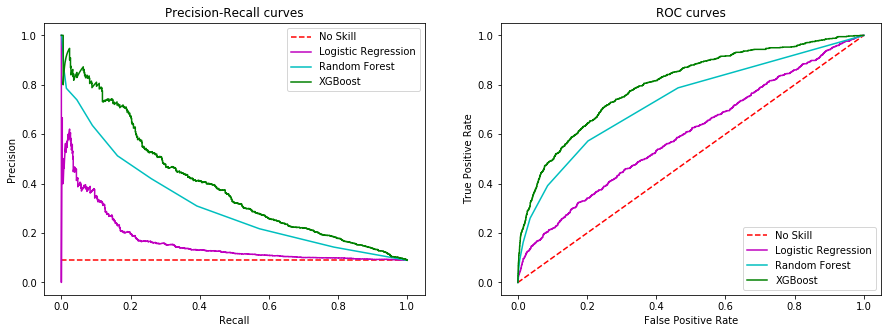

In [57]:
lrc_probs_rand = lrc.predict_proba(X_test_full_rand)
lrc_probs_rand = lrc_probs_rand[:,1]
lrc_precision_rand, lrc_recall_rand, lrc_threshold_rand = precision_recall_curve(Y_test_full_rand, lrc_probs_rand)
lrc_f1_rand, lrc_auc_rand = f1_score(Y_test_full_rand, lrc_y_pred_full_rand), auc(lrc_recall_rand, lrc_precision_rand)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_rand, lrc_auc_rand))

rfc_probs_rand = rfc.predict_proba(X_test_full_rand)
rfc_probs_rand = rfc_probs_rand[:,1]
rfc_precision_rand, rfc_recall_rand, rfc_threshold_rand = precision_recall_curve(Y_test_full_rand, rfc_probs_rand)
rfc_f1_rand, rfc_auc_rand = f1_score(Y_test_full_rand, rfc_y_pred_full_rand), auc(rfc_recall_rand, rfc_precision_rand)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_rand, rfc_auc_rand))

xgb_probs_rand = xgb.predict_proba(X_test_full_rand)
xgb_probs_rand = xgb_probs_rand[:,1]
xgb_precision_rand, xgb_recall_rand, xgb_threshold_rand = precision_recall_curve(Y_test_full_rand, xgb_probs_rand)
xgb_f1_rand, xgb_auc_rand = f1_score(Y_test_full_rand, xgb_y_pred_full_rand), auc(xgb_recall_rand, xgb_precision_rand)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_rand, xgb_auc_rand))

fig_rand, (ax1_rand, ax2_rand) = plt.subplots(1, 2, figsize=(15,5))

ax1_rand.set_title('Precision-Recall curves')
no_skill_rand = len(Y_test_full_rand[Y_test_full_rand==1]) / len(Y_test_full_rand)
ax1_rand.plot([0, 1], [no_skill_rand, no_skill_rand], linestyle='--', color = 'r', label='No Skill')
ax1_rand.plot(lrc_recall_rand, lrc_precision_rand, color='m', label='Logistic Regression')
ax1_rand.plot(rfc_recall_rand, rfc_precision_rand, color = 'c', label='Random Forest')
ax1_rand.plot(xgb_recall_rand, xgb_precision_rand, color = 'g', label='XGBoost')

ax1_rand.set(xlabel='Recall', ylabel='Precision')
ax1_rand.legend()

lrc_fpr_rand, lrc_tpr_rand, _ = roc_curve(Y_test_full_rand, lrc_probs_rand)
rfc_fpr_rand, rfc_tpr_rand, _ = roc_curve(Y_test_full_rand, rfc_probs_rand)
xgb_fpr_rand, xgb_tpr_rand, _ = roc_curve(Y_test_full_rand, xgb_probs_rand)

ax2_rand.set_title('ROC curves')

ax2_rand.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_rand.plot(lrc_fpr_rand, lrc_tpr_rand, color='m', label='Logistic Regression')
ax2_rand.plot(rfc_fpr_rand, rfc_tpr_rand, color = 'c', label='Random Forest')
ax2_rand.plot(xgb_fpr_rand, xgb_tpr_rand, color = 'g', label='XGBoost')

ax2_rand.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_rand.legend()

pyplot.show()

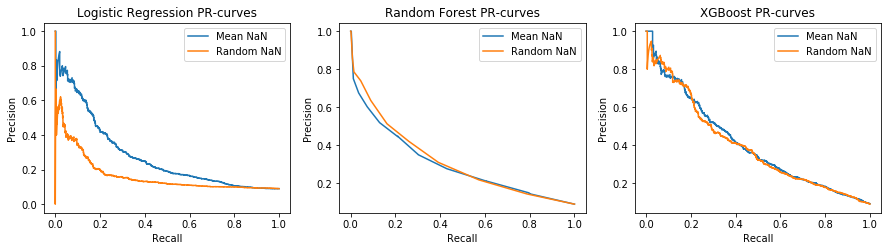

In [58]:
fig_mean_vs_rand, (ax1_mean_vs_rand, ax2_mean_vs_rand, ax3_mean_vs_rand) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_mean_vs_rand.set_title('Logistic Regression PR-curves')
ax1_mean_vs_rand.plot(lrc_recall, lrc_precision, color='tab:blue', label='Mean NaN')
ax1_mean_vs_rand.plot(lrc_recall_rand, lrc_precision_rand, color='tab:orange', label='Random NaN')
ax1_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax1_mean_vs_rand.legend()

ax2_mean_vs_rand.set_title('Random Forest PR-curves')
ax2_mean_vs_rand.plot(rfc_recall, rfc_precision, color = 'tab:blue', label='Mean NaN')
ax2_mean_vs_rand.plot(rfc_recall_rand, rfc_precision_rand, color = 'tab:orange', label='Random NaN')
ax2_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax2_mean_vs_rand.legend()

ax3_mean_vs_rand.set_title('XGBoost PR-curves')
ax3_mean_vs_rand.plot(xgb_recall, xgb_precision, color = 'tab:blue', label='Mean NaN')
ax3_mean_vs_rand.plot(xgb_recall_rand, xgb_precision_rand, color = 'tab:orange', label='Random NaN')
ax3_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax3_mean_vs_rand.legend()

# NaN Row Average

In [59]:
china_rowAvg = pd.read_csv('C:/Users/boont/Desktop/szakdoga/data/china/data.csv')
china_rowAvg = china_rowAvg.drop(['CONS_NO'], axis = 1)
china_rowAvg

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [60]:
#filling NaN
china_rowAvg = china_rowAvg.apply(lambda x: x.fillna(x.mean()),axis=1)
china_rowAvg

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1.0,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.750000,17.840000,14.920000
1,1.0,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,...,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077
3,1.0,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.820000,19.370000,15.920000
4,1.0,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,3.530000,3.410000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.140000,18.410000,17.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0.0,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.640000,3.400000,4.380000
42368,0.0,2.700000,4.390000,3.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.190000,4.570000,4.000000
42369,0.0,0.580000,0.840000,1.610000,0.900000,0.600000,0.820000,0.890000,0.030000,0.730000,...,1.339290,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.670000,2.440000,1.150000
42370,0.0,16.890000,13.840000,13.500000,14.600000,14.460000,12.340000,15.370000,17.010000,13.460000,...,21.130000,13.750000,22.610000,18.830000,25.520000,18.110000,19.310000,17.480000,17.200000,15.280000


In [61]:
X_full_rowAvg = china_rowAvg.drop(['FLAG'], axis = 1)
Y_full_rowAvg = china_rowAvg['FLAG']

In [62]:
X_train_full_rowAvg, X_test_full_rowAvg, Y_train_full_rowAvg, Y_test_full_rowAvg = train_test_split(X_full_rowAvg, Y_full_rowAvg, test_size = 0.2, random_state = 42)

## Logistic Regression

In [63]:
start = time.time()
lrc.fit(X_train_full_rowAvg,Y_train_full_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_rowAvg = lrc.predict(X_test_full_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg, lrc_y_pred_full_rowAvg)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg, lrc_y_pred_full_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg, lrc_y_pred_full_rowAvg))
print(classification_report(Y_test_full_rowAvg, lrc_y_pred_full_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg, lrc.predict_proba(X_test_full_rowAvg)[:,1])}")

Training time: 5.975590467453003sec
Accuracy: 0.8831858407079646
Recall: 0.5712198473506903
[[7340  377]
 [ 613  145]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      7717
         1.0       0.28      0.19      0.23       758

    accuracy                           0.88      8475
   macro avg       0.60      0.57      0.58      8475
weighted avg       0.87      0.88      0.87      8475

AUC: 0.5364155072770497


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [64]:
start = time.time()
rfc.fit(X_train_full_rowAvg,Y_train_full_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_rowAvg = rfc.predict(X_test_full_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg, rfc_y_pred_full_rowAvg)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg, rfc_y_pred_full_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg, rfc_y_pred_full_rowAvg))
print(classification_report(Y_test_full_rowAvg, rfc_y_pred_full_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg, rfc.predict_proba(X_test_full_rowAvg)[:,1])}")

Training time: 18.374515771865845sec
Accuracy: 0.9107964601769911
Recall: 0.5536650570665524
[[7629   88]
 [ 668   90]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7717
         1.0       0.51      0.12      0.19       758

    accuracy                           0.91      8475
   macro avg       0.71      0.55      0.57      8475
weighted avg       0.88      0.91      0.88      8475

AUC: 0.7191032682187802


## XGBoost

In [65]:
start = time.time()
xgb.fit(X_train_full_rowAvg,Y_train_full_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_rowAvg = xgb.predict(X_test_full_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg, xgb_y_pred_full_rowAvg)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg, xgb_y_pred_full_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg,xgb_y_pred_full_rowAvg))
print(classification_report(Y_test_full_rowAvg, xgb_y_pred_full_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg, xgb.predict_proba(X_test_full_rowAvg)[:,1])}")

Training time: 143.56090784072876sec
Accuracy: 0.9146902654867257
Recall: 0.539742551738734
[[7689   28]
 [ 695   63]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7717
         1.0       0.69      0.08      0.15       758

    accuracy                           0.91      8475
   macro avg       0.80      0.54      0.55      8475
weighted avg       0.90      0.91      0.88      8475

AUC: 0.7892582356808786


Logistic Regression: f1=0.227 auc=0.177
RowAvgom Forest: f1=0.192 auc=0.283
XGBoost: f1=0.148 auc=0.352


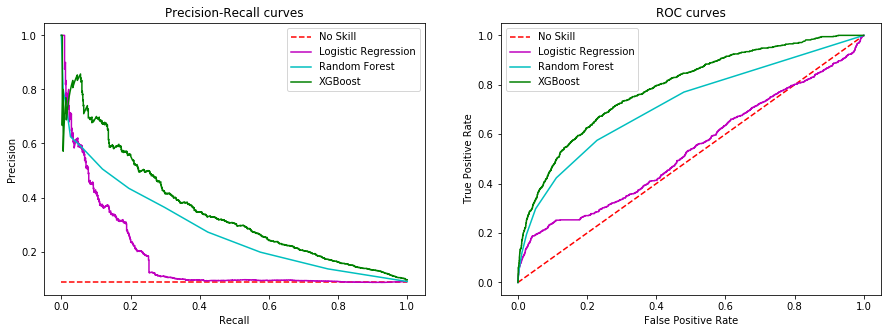

In [66]:
lrc_probs_rowAvg = lrc.predict_proba(X_test_full_rowAvg)
lrc_probs_rowAvg = lrc_probs_rowAvg[:,1]
lrc_precision_rowAvg, lrc_recall_rowAvg, lrc_threshold_rowAvg = precision_recall_curve(Y_test_full_rowAvg, lrc_probs_rowAvg)
lrc_f1_rowAvg, lrc_auc_rowAvg = f1_score(Y_test_full_rowAvg, lrc_y_pred_full_rowAvg), auc(lrc_recall_rowAvg, lrc_precision_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_rowAvg, lrc_auc_rowAvg))

rfc_probs_rowAvg = rfc.predict_proba(X_test_full_rowAvg)
rfc_probs_rowAvg = rfc_probs_rowAvg[:,1]
rfc_precision_rowAvg, rfc_recall_rowAvg, rfc_threshold_rowAvg = precision_recall_curve(Y_test_full_rowAvg, rfc_probs_rowAvg)
rfc_f1_rowAvg, rfc_auc_rowAvg = f1_score(Y_test_full_rowAvg, rfc_y_pred_full_rowAvg), auc(rfc_recall_rowAvg, rfc_precision_rowAvg)
print('RowAvgom Forest: f1=%.3f auc=%.3f' % (rfc_f1_rowAvg, rfc_auc_rowAvg))

xgb_probs_rowAvg = xgb.predict_proba(X_test_full_rowAvg)
xgb_probs_rowAvg = xgb_probs_rowAvg[:,1]
xgb_precision_rowAvg, xgb_recall_rowAvg, xgb_threshold_rowAvg = precision_recall_curve(Y_test_full_rowAvg, xgb_probs_rowAvg)
xgb_f1_rowAvg, xgb_auc_rowAvg = f1_score(Y_test_full_rowAvg, xgb_y_pred_full_rowAvg), auc(xgb_recall_rowAvg, xgb_precision_rowAvg)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_rowAvg, xgb_auc_rowAvg))

fig_rowAvg, (ax1_rowAvg, ax2_rowAvg) = plt.subplots(1, 2, figsize=(15,5))

ax1_rowAvg.set_title('Precision-Recall curves')
no_skill_rowAvg = len(Y_test_full_rowAvg[Y_test_full_rowAvg==1]) / len(Y_test_full_rowAvg)
ax1_rowAvg.plot([0, 1], [no_skill_rowAvg, no_skill_rowAvg], linestyle='--', color = 'r', label='No Skill')
ax1_rowAvg.plot(lrc_recall_rowAvg, lrc_precision_rowAvg, color='m', label='Logistic Regression')
ax1_rowAvg.plot(rfc_recall_rowAvg, rfc_precision_rowAvg, color = 'c', label='Random Forest')
ax1_rowAvg.plot(xgb_recall_rowAvg, xgb_precision_rowAvg, color = 'g', label='XGBoost')

ax1_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax1_rowAvg.legend()

lrc_fpr_rowAvg, lrc_tpr_rowAvg, _ = roc_curve(Y_test_full_rowAvg, lrc_probs_rowAvg)
rfc_fpr_rowAvg, rfc_tpr_rowAvg, _ = roc_curve(Y_test_full_rowAvg, rfc_probs_rowAvg)
xgb_fpr_rowAvg, xgb_tpr_rowAvg, _ = roc_curve(Y_test_full_rowAvg, xgb_probs_rowAvg)

ax2_rowAvg.set_title('ROC curves')

ax2_rowAvg.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_rowAvg.plot(lrc_fpr_rowAvg, lrc_tpr_rowAvg, color='m', label='Logistic Regression')
ax2_rowAvg.plot(rfc_fpr_rowAvg, rfc_tpr_rowAvg, color = 'c', label='Random Forest')
ax2_rowAvg.plot(xgb_fpr_rowAvg, xgb_tpr_rowAvg, color = 'g', label='XGBoost')

ax2_rowAvg.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_rowAvg.legend()

pyplot.show()

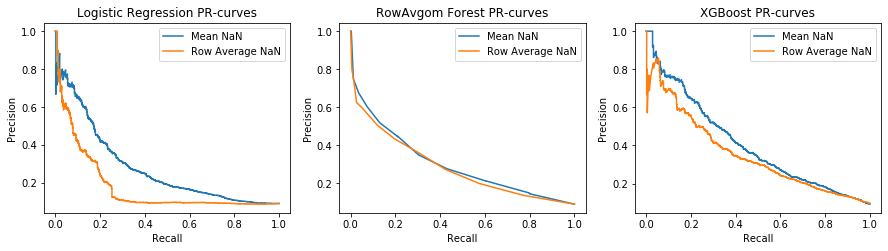

In [67]:
fig_mean_vs_rowAvg, (ax1_mean_vs_rowAvg, ax2_mean_vs_rowAvg, ax3_mean_vs_rowAvg) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_mean_vs_rowAvg.set_title('Logistic Regression PR-curves')
ax1_mean_vs_rowAvg.plot(lrc_recall, lrc_precision, color='tab:blue', label='Mean NaN')
ax1_mean_vs_rowAvg.plot(lrc_recall_rowAvg, lrc_precision_rowAvg, color='tab:orange', label='Row Average NaN')
ax1_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax1_mean_vs_rowAvg.legend()

ax2_mean_vs_rowAvg.set_title('RowAvgom Forest PR-curves')
ax2_mean_vs_rowAvg.plot(rfc_recall, rfc_precision, color = 'tab:blue', label='Mean NaN')
ax2_mean_vs_rowAvg.plot(rfc_recall_rowAvg, rfc_precision_rowAvg, color = 'tab:orange', label='Row Average NaN')
ax2_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax2_mean_vs_rowAvg.legend()

ax3_mean_vs_rowAvg.set_title('XGBoost PR-curves')
ax3_mean_vs_rowAvg.plot(xgb_recall, xgb_precision, color = 'tab:blue', label='Mean NaN')
ax3_mean_vs_rowAvg.plot(xgb_recall_rowAvg, xgb_precision_rowAvg, color = 'tab:orange', label='Row Average NaN')
ax3_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax3_mean_vs_rowAvg.legend()

# Without outliers, NaN-s are mean

In [68]:
china_mean_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreMean.csv')
china_mean_noOutliers = china_mean_noOutliers.drop(['Unnamed: 0'], axis = 1)
china_mean_noOutliers

,FLAG,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,4.907544,5.015036,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,4.907544,5.015036,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,4.907544,5.015036,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,4.907544,5.015036,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,3.680000,3.530000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,4.907544,5.015036,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,4.040000,5.680000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,0.700000,1.230000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,23.990000,12.340000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [69]:
X_full_mean_noOutliers = china_mean_noOutliers.drop(['FLAG'], axis = 1)
Y_full_mean_noOutliers = china_mean_noOutliers['FLAG']

In [70]:
X_train_full_mean_noOutliers, X_test_full_mean_noOutliers, Y_train_full_mean_noOutliers, Y_test_full_mean_noOutliers = train_test_split(X_full_mean_noOutliers, Y_full_mean_noOutliers, test_size = 0.2, random_state = 42)

## Logistic Regression

In [71]:
start = time.time()
lrc.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_mean_noOutliers = lrc.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, lrc_y_pred_full_mean_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, lrc_y_pred_full_mean_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, lrc_y_pred_full_mean_noOutliers))
print(classification_report(Y_test_full_mean_noOutliers, lrc_y_pred_full_mean_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, lrc.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Training time: 4.253809928894043sec
Accuracy: 0.9163714574898786
Recall: 0.5889614386844304
[[7107   75]
 [ 586  136]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.64      0.19      0.29       722

    accuracy                           0.92      7904
   macro avg       0.78      0.59      0.62      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7034340043707299


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [72]:
start = time.time()
rfc.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_mean_noOutliers = rfc.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, rfc_y_pred_full_mean_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, rfc_y_pred_full_mean_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, rfc_y_pred_full_mean_noOutliers))
print(classification_report(Y_test_full_mean_noOutliers, rfc_y_pred_full_mean_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, rfc.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Training time: 13.680691480636597sec
Accuracy: 0.9176366396761133
Recall: 0.5946408418707588
[[7109   73]
 [ 578  144]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.66      0.20      0.31       722

    accuracy                           0.92      7904
   macro avg       0.79      0.59      0.63      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7639736460264235


## XGBoost

In [73]:
start = time.time()
xgb.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_mean_noOutliers = xgb.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_y_pred_full_mean_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_y_pred_full_mean_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_y_pred_full_mean_noOutliers))
print(classification_report(Y_test_full_mean_noOutliers, xgb_y_pred_full_mean_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Training time: 89.14963173866272sec
Accuracy: 0.9207995951417004
Recall: 0.5826774538685896
[[7156   26]
 [ 600  122]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.82      0.17      0.28       722

    accuracy                           0.92      7904
   macro avg       0.87      0.58      0.62      7904
weighted avg       0.91      0.92      0.90      7904

AUC: 0.8105583480091426


Logistic Regression: f1=0.292 auc=0.348
Random Forest: f1=0.307 auc=0.410
XGBoost: f1=0.280 auc=0.454


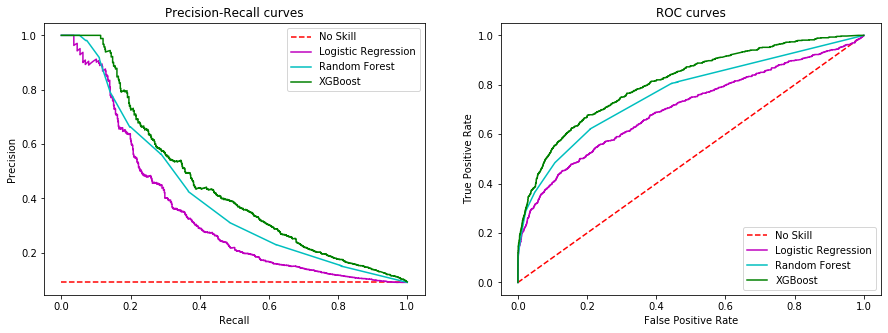

In [74]:
lrc_probs_mean_noOutliers = lrc.predict_proba(X_test_full_mean_noOutliers)
lrc_probs_mean_noOutliers = lrc_probs_mean_noOutliers[:,1]
lrc_precision_mean_noOutliers, lrc_recall_mean_noOutliers, lrc_threshold_mean_noOutliers = precision_recall_curve(Y_test_full_mean_noOutliers, lrc_probs_mean_noOutliers)
lrc_f1_mean_noOutliers, lrc_auc_mean_noOutliers = f1_score(Y_test_full_mean_noOutliers, lrc_y_pred_full_mean_noOutliers), auc(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_mean_noOutliers, lrc_auc_mean_noOutliers))

rfc_probs_mean_noOutliers = rfc.predict_proba(X_test_full_mean_noOutliers)
rfc_probs_mean_noOutliers = rfc_probs_mean_noOutliers[:,1]
rfc_precision_mean_noOutliers, rfc_recall_mean_noOutliers, rfc_threshold_mean_noOutliers = precision_recall_curve(Y_test_full_mean_noOutliers, rfc_probs_mean_noOutliers)
rfc_f1_mean_noOutliers, rfc_auc_mean_noOutliers = f1_score(Y_test_full_mean_noOutliers, rfc_y_pred_full_mean_noOutliers), auc(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_mean_noOutliers, rfc_auc_mean_noOutliers))

xgb_probs_mean_noOutliers = xgb.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_mean_noOutliers = xgb_probs_mean_noOutliers[:,1]
xgb_precision_mean_noOutliers, xgb_recall_mean_noOutliers, xgb_threshold_mean_noOutliers = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_mean_noOutliers)
xgb_f1_mean_noOutliers, xgb_auc_mean_noOutliers = f1_score(Y_test_full_mean_noOutliers, xgb_y_pred_full_mean_noOutliers), auc(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_mean_noOutliers, xgb_auc_mean_noOutliers))

fig_mean_noOutliers, (ax1_mean_noOutliers, ax2_mean_noOutliers) = plt.subplots(1, 2, figsize=(15,5))

ax1_mean_noOutliers.set_title('Precision-Recall curves')
no_skill_mean_noOutliers = len(Y_test_full_mean_noOutliers[Y_test_full_mean_noOutliers==1]) / len(Y_test_full_mean_noOutliers)
ax1_mean_noOutliers.plot([0, 1], [no_skill_mean_noOutliers, no_skill_mean_noOutliers], linestyle='--', color = 'r', label='No Skill')
ax1_mean_noOutliers.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='m', label='Logistic Regression')
ax1_mean_noOutliers.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'c', label='Random Forest')
ax1_mean_noOutliers.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'g', label='XGBoost')

ax1_mean_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax1_mean_noOutliers.legend()

lrc_fpr_mean_noOutliers, lrc_tpr_mean_noOutliers, _ = roc_curve(Y_test_full_mean_noOutliers, lrc_probs_mean_noOutliers)
rfc_fpr_mean_noOutliers, rfc_tpr_mean_noOutliers, _ = roc_curve(Y_test_full_mean_noOutliers, rfc_probs_mean_noOutliers)
xgb_fpr_mean_noOutliers, xgb_tpr_mean_noOutliers, _ = roc_curve(Y_test_full_mean_noOutliers, xgb_probs_mean_noOutliers)

ax2_mean_noOutliers.set_title('ROC curves')

ax2_mean_noOutliers.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_mean_noOutliers.plot(lrc_fpr_mean_noOutliers, lrc_tpr_mean_noOutliers, color='m', label='Logistic Regression')
ax2_mean_noOutliers.plot(rfc_fpr_mean_noOutliers, rfc_tpr_mean_noOutliers, color = 'c', label='Random Forest')
ax2_mean_noOutliers.plot(xgb_fpr_mean_noOutliers, xgb_tpr_mean_noOutliers, color = 'g', label='XGBoost')

ax2_mean_noOutliers.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_mean_noOutliers.legend()

pyplot.show()

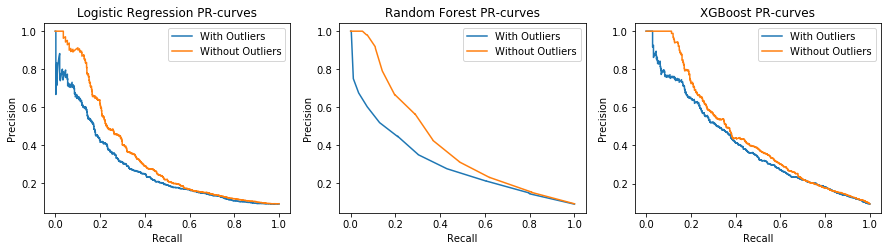

In [75]:
fig_mean_outliers_vs_noOutliers, (ax1_mean_outliers_vs_noOutliers, ax2_mean_outliers_vs_noOutliers, ax3_mean_outliers_vs_noOutliers) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_mean_outliers_vs_noOutliers.set_title('Logistic Regression PR-curves')
ax1_mean_outliers_vs_noOutliers.plot(lrc_recall, lrc_precision, color='tab:blue', label='With Outliers')
ax1_mean_outliers_vs_noOutliers.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='tab:orange', label='Without Outliers')
ax1_mean_outliers_vs_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax1_mean_outliers_vs_noOutliers.legend()

ax2_mean_outliers_vs_noOutliers.set_title('Random Forest PR-curves')
ax2_mean_outliers_vs_noOutliers.plot(rfc_recall, rfc_precision, color = 'tab:blue', label='With Outliers')
ax2_mean_outliers_vs_noOutliers.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'tab:orange', label='Without Outliers')
ax2_mean_outliers_vs_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax2_mean_outliers_vs_noOutliers.legend()

ax3_mean_outliers_vs_noOutliers.set_title('XGBoost PR-curves')
ax3_mean_outliers_vs_noOutliers.plot(xgb_recall, xgb_precision, color = 'tab:blue', label='With Outliers')
ax3_mean_outliers_vs_noOutliers.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'tab:orange', label='Without Outliers')
ax3_mean_outliers_vs_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax3_mean_outliers_vs_noOutliers.legend()

# Without outliers, NaNs are random

In [76]:
china_rand_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreRandomized.csv')
china_rand_noOutliers = china_rand_noOutliers.drop(['Unnamed: 0'], axis = 1)
china_rand_noOutliers

,FLAG,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,106.00,152.00,134.00,12.00,103.00,68.00,112.00,36.00,29.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,129.00,168.00,75.00,48.00,19.00,110.00,103.00,87.00,140.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,19.00,215.00,121.00,117.00,32.00,129.00,71.00,116.00,79.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,62.00,149.00,122.00,89.00,131.00,116.00,91.00,69.00,49.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,52.00,44.00,110.00,104.00,103.00,80.00,131.00,40.00,23.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [77]:
X_full_rand_noOutliers = china_rand_noOutliers.drop(['FLAG'], axis = 1)
Y_full_rand_noOutliers = china_rand_noOutliers['FLAG']

In [78]:
X_train_full_rand_noOutliers, X_test_full_rand_noOutliers, Y_train_full_rand_noOutliers, Y_test_full_rand_noOutliers = train_test_split(X_full_rand_noOutliers, Y_full_rand_noOutliers, test_size = 0.2, random_state = 42)

## Logistic Regression

In [79]:
start = time.time()
lrc.fit(X_train_full_rand_noOutliers,Y_train_full_rand_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_rand_noOutliers = lrc.predict(X_test_full_rand_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rand_noOutliers, lrc_y_pred_full_rand_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rand_noOutliers, lrc_y_pred_full_rand_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rand_noOutliers, lrc_y_pred_full_rand_noOutliers))
print(classification_report(Y_test_full_rand_noOutliers, lrc_y_pred_full_rand_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rand_noOutliers, lrc.predict_proba(X_test_full_rand_noOutliers)[:,1])}")

Training time: 4.388495206832886sec
Accuracy: 0.9000506072874493
Recall: 0.5637851939790998
[[7004  178]
 [ 612  110]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7182
           1       0.38      0.15      0.22       722

    accuracy                           0.90      7904
   macro avg       0.65      0.56      0.58      7904
weighted avg       0.87      0.90      0.88      7904

AUC: 0.6489702634548822


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [80]:
start = time.time()
rfc.fit(X_train_full_rand_noOutliers,Y_train_full_rand_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_rand_noOutliers = rfc.predict(X_test_full_rand_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rand_noOutliers, rfc_y_pred_full_rand_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rand_noOutliers, rfc_y_pred_full_rand_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rand_noOutliers, rfc_y_pred_full_rand_noOutliers))
print(classification_report(Y_test_full_rand_noOutliers, rfc_y_pred_full_rand_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rand_noOutliers, rfc.predict_proba(X_test_full_rand_noOutliers)[:,1])}")

Training time: 14.364346981048584sec
Accuracy: 0.9178896761133604
Recall: 0.5785846194433453
[[7137   45]
 [ 604  118]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.72      0.16      0.27       722

    accuracy                           0.92      7904
   macro avg       0.82      0.58      0.61      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7421975221217094


## XGBoost

In [81]:
start = time.time()
xgb.fit(X_train_full_rand_noOutliers,Y_train_full_rand_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_rand_noOutliers = xgb.predict(X_test_full_rand_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rand_noOutliers, xgb_y_pred_full_rand_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rand_noOutliers, xgb_y_pred_full_rand_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rand_noOutliers, xgb_y_pred_full_rand_noOutliers))
print(classification_report(Y_test_full_rand_noOutliers, xgb_y_pred_full_rand_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rand_noOutliers, xgb.predict_proba(X_test_full_rand_noOutliers)[:,1])}")

Training time: 99.74132013320923sec
Accuracy: 0.9209261133603239
Recall: 0.5895989974937343
[[7146   36]
 [ 589  133]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.79      0.18      0.30       722

    accuracy                           0.92      7904
   macro avg       0.86      0.59      0.63      7904
weighted avg       0.91      0.92      0.90      7904

AUC: 0.8207810808955291


Logistic Regression: f1=0.218 auc=0.214
Random Forest: f1=0.267 auc=0.385
XGBoost: f1=0.299 auc=0.463


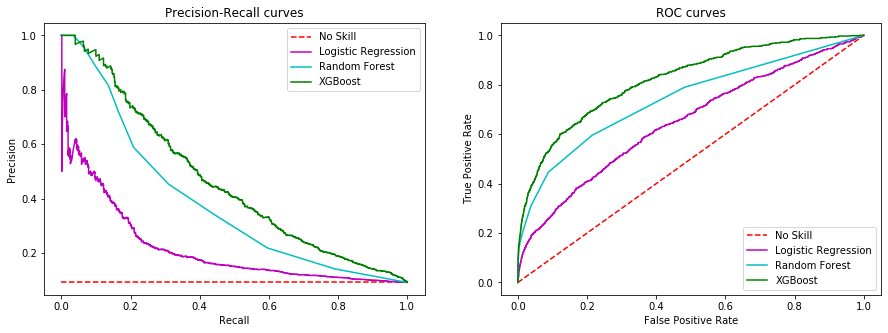

In [82]:
lrc_probs_rand_noOutliers = lrc.predict_proba(X_test_full_rand_noOutliers)
lrc_probs_rand_noOutliers = lrc_probs_rand_noOutliers[:,1]
lrc_precision_rand_noOutliers, lrc_recall_rand_noOutliers, lrc_threshold_rand_noOutliers = precision_recall_curve(Y_test_full_rand_noOutliers, lrc_probs_rand_noOutliers)
lrc_f1_rand_noOutliers, lrc_auc_rand_noOutliers = f1_score(Y_test_full_rand_noOutliers, lrc_y_pred_full_rand_noOutliers), auc(lrc_recall_rand_noOutliers, lrc_precision_rand_noOutliers)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_rand_noOutliers, lrc_auc_rand_noOutliers))

rfc_probs_rand_noOutliers = rfc.predict_proba(X_test_full_rand_noOutliers)
rfc_probs_rand_noOutliers = rfc_probs_rand_noOutliers[:,1]
rfc_precision_rand_noOutliers, rfc_recall_rand_noOutliers, rfc_threshold_rand_noOutliers = precision_recall_curve(Y_test_full_rand_noOutliers, rfc_probs_rand_noOutliers)
rfc_f1_rand_noOutliers, rfc_auc_rand_noOutliers = f1_score(Y_test_full_rand_noOutliers, rfc_y_pred_full_rand_noOutliers), auc(rfc_recall_rand_noOutliers, rfc_precision_rand_noOutliers)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_rand_noOutliers, rfc_auc_rand_noOutliers))

xgb_probs_rand_noOutliers = xgb.predict_proba(X_test_full_rand_noOutliers)
xgb_probs_rand_noOutliers = xgb_probs_rand_noOutliers[:,1]
xgb_precision_rand_noOutliers, xgb_recall_rand_noOutliers, xgb_threshold_rand_noOutliers = precision_recall_curve(Y_test_full_rand_noOutliers, xgb_probs_rand_noOutliers)
xgb_f1_rand_noOutliers, xgb_auc_rand_noOutliers = f1_score(Y_test_full_rand_noOutliers, xgb_y_pred_full_rand_noOutliers), auc(xgb_recall_rand_noOutliers, xgb_precision_rand_noOutliers)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_rand_noOutliers, xgb_auc_rand_noOutliers))

fig_rand_noOutliers, (ax1_rand_noOutliers, ax2_rand_noOutliers) = plt.subplots(1, 2, figsize=(15,5))

ax1_rand_noOutliers.set_title('Precision-Recall curves')
no_skill_rand_noOutliers = len(Y_test_full_rand_noOutliers[Y_test_full_rand_noOutliers==1]) / len(Y_test_full_rand_noOutliers)
ax1_rand_noOutliers.plot([0, 1], [no_skill_rand_noOutliers, no_skill_rand_noOutliers], linestyle='--', color = 'r', label='No Skill')
ax1_rand_noOutliers.plot(lrc_recall_rand_noOutliers, lrc_precision_rand_noOutliers, color='m', label='Logistic Regression')
ax1_rand_noOutliers.plot(rfc_recall_rand_noOutliers, rfc_precision_rand_noOutliers, color = 'c', label='Random Forest')
ax1_rand_noOutliers.plot(xgb_recall_rand_noOutliers, xgb_precision_rand_noOutliers, color = 'g', label='XGBoost')

ax1_rand_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax1_rand_noOutliers.legend()

lrc_fpr_rand_noOutliers, lrc_tpr_rand_noOutliers, _ = roc_curve(Y_test_full_rand_noOutliers, lrc_probs_rand_noOutliers)
rfc_fpr_rand_noOutliers, rfc_tpr_rand_noOutliers, _ = roc_curve(Y_test_full_rand_noOutliers, rfc_probs_rand_noOutliers)
xgb_fpr_rand_noOutliers, xgb_tpr_rand_noOutliers, _ = roc_curve(Y_test_full_rand_noOutliers, xgb_probs_rand_noOutliers)

ax2_rand_noOutliers.set_title('ROC curves')

ax2_rand_noOutliers.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_rand_noOutliers.plot(lrc_fpr_rand_noOutliers, lrc_tpr_rand_noOutliers, color='m', label='Logistic Regression')
ax2_rand_noOutliers.plot(rfc_fpr_rand_noOutliers, rfc_tpr_rand_noOutliers, color = 'c', label='Random Forest')
ax2_rand_noOutliers.plot(xgb_fpr_rand_noOutliers, xgb_tpr_rand_noOutliers, color = 'g', label='XGBoost')

ax2_rand_noOutliers.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_rand_noOutliers.legend()

pyplot.show()

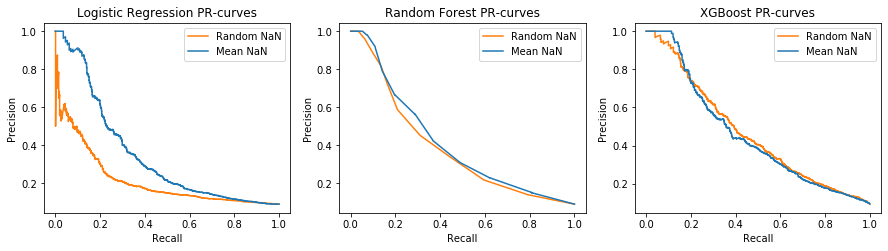

In [83]:
fig_noOutliers_mean_vs_rand, (ax1_noOutliers_mean_vs_rand, ax2_noOutliers_mean_vs_rand, ax3_noOutliers_mean_vs_rand) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_rand.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_rand.plot(lrc_recall_rand_noOutliers, lrc_precision_rand_noOutliers, color='tab:orange', label='Random NaN')
ax1_noOutliers_mean_vs_rand.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='tab:blue', label='Mean NaN')
ax1_noOutliers_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_rand.legend()

ax2_noOutliers_mean_vs_rand.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_rand.plot(rfc_recall_rand_noOutliers, rfc_precision_rand_noOutliers, color = 'tab:orange', label='Random NaN')
ax2_noOutliers_mean_vs_rand.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax2_noOutliers_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_rand.legend()

ax3_noOutliers_mean_vs_rand.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_rand.plot(xgb_recall_rand_noOutliers, xgb_precision_rand_noOutliers, color = 'tab:orange', label='Random NaN')
ax3_noOutliers_mean_vs_rand.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax3_noOutliers_mean_vs_rand.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_rand.legend()

# Without outliers, NaNs are row average

In [84]:
china_rowAvg_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_without_outliers_rowAvg.csv')
china_rowAvg_noOutliers

,Unnamed: 0,FLAG,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,0,1.0,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,1.0,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,1.0,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,3,1.0,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,4,1.0,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,3.680000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,39514,0.0,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,39515,0.0,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,4.040000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,39516,0.0,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,0.700000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,39517,0.0,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,23.990000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [85]:
#filling NaN
china_rowAvg_noOutliers = china_rowAvg_noOutliers.apply(lambda x: x.fillna(x.mean()),axis=1)
china_rowAvg_noOutliers

,Unnamed: 0,FLAG,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,0.0,1.0,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1.0,1.0,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2.0,1.0,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,3.0,1.0,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,4.0,1.0,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,3.680000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,39514.0,0.0,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,39515.0,0.0,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,4.040000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,39516.0,0.0,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,0.700000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,39517.0,0.0,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,23.990000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [86]:
china_rowAvg_noOutliers.to_csv('noOutliers_rowAvg.csv')

In [87]:
X_full_rowAvg_noOutliers = china_rowAvg_noOutliers.drop(['FLAG'], axis = 1)
Y_full_rowAvg_noOutliers = china_rowAvg_noOutliers['FLAG']

In [88]:
X_train_full_rowAvg_noOutliers, X_test_full_rowAvg_noOutliers, Y_train_full_rowAvg_noOutliers, Y_test_full_rowAvg_noOutliers = train_test_split(X_full_rowAvg_noOutliers, Y_full_rowAvg_noOutliers, test_size = 0.2, random_state = 42)

## Logistic Regression

In [89]:
start = time.time()
lrc.fit(X_train_full_rowAvg_noOutliers,Y_train_full_rowAvg_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_rowAvg_noOutliers = lrc.predict(X_test_full_rowAvg_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_noOutliers, lrc_y_pred_full_rowAvg_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_noOutliers, lrc_y_pred_full_rowAvg_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_noOutliers, lrc_y_pred_full_rowAvg_noOutliers))
print(classification_report(Y_test_full_rowAvg_noOutliers, lrc_y_pred_full_rowAvg_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_noOutliers, lrc.predict_proba(X_test_full_rowAvg_noOutliers)[:,1])}")

Training time: 5.234013557434082sec
Accuracy: 0.9703947368421053
Recall: 0.8641120344721452
[[7140   42]
 [ 192  530]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      7182
         1.0       0.93      0.73      0.82       722

    accuracy                           0.97      7904
   macro avg       0.95      0.86      0.90      7904
weighted avg       0.97      0.97      0.97      7904

AUC: 0.9947261582704068


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [90]:
start = time.time()
rfc.fit(X_train_full_rowAvg_noOutliers,Y_train_full_rowAvg_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_rowAvg_noOutliers = rfc.predict(X_test_full_rowAvg_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_noOutliers, rfc_y_pred_full_rowAvg_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_noOutliers, rfc_y_pred_full_rowAvg_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_noOutliers, rfc_y_pred_full_rowAvg_noOutliers))
print(classification_report(Y_test_full_rowAvg_noOutliers, rfc_y_pred_full_rowAvg_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_noOutliers, rfc.predict_proba(X_test_full_rowAvg_noOutliers)[:,1])}")

Training time: 14.889507055282593sec
Accuracy: 0.9765941295546559
Recall: 0.8849646044936903
[[7161   21]
 [ 164  558]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      7182
         1.0       0.96      0.77      0.86       722

    accuracy                           0.98      7904
   macro avg       0.97      0.88      0.92      7904
weighted avg       0.98      0.98      0.98      7904

AUC: 0.9963513932569188


## XGBoost

In [91]:
start = time.time()
xgb.fit(X_train_full_rowAvg_noOutliers,Y_train_full_rowAvg_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_rowAvg_noOutliers = xgb.predict(X_test_full_rowAvg_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_noOutliers, xgb_y_pred_full_rowAvg_noOutliers)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_noOutliers, xgb_y_pred_full_rowAvg_noOutliers, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_noOutliers, xgb_y_pred_full_rowAvg_noOutliers))
print(classification_report(Y_test_full_rowAvg_noOutliers, xgb_y_pred_full_rowAvg_noOutliers))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_noOutliers, xgb.predict_proba(X_test_full_rowAvg_noOutliers)[:,1])}")

Training time: 80.58937406539917sec
Accuracy: 1.0
Recall: 1.0
[[7182    0]
 [   0  722]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7182
         1.0       1.00      1.00      1.00       722

    accuracy                           1.00      7904
   macro avg       1.00      1.00      1.00      7904
weighted avg       1.00      1.00      1.00      7904

AUC: 1.0


Logistic Regression: f1=0.819 auc=0.942
Random Forest: f1=0.858 auc=0.965
XGBoost: f1=1.000 auc=1.000


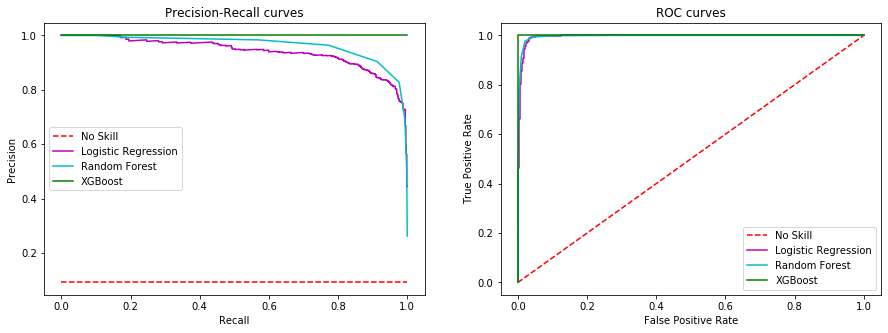

In [92]:
lrc_probs_rowAvg_noOutliers = lrc.predict_proba(X_test_full_rowAvg_noOutliers)
lrc_probs_rowAvg_noOutliers = lrc_probs_rowAvg_noOutliers[:,1]
lrc_precision_rowAvg_noOutliers, lrc_recall_rowAvg_noOutliers, lrc_threshold_rowAvg_noOutliers = precision_recall_curve(Y_test_full_rowAvg_noOutliers, lrc_probs_rowAvg_noOutliers)
lrc_f1_rowAvg_noOutliers, lrc_auc_rowAvg_noOutliers = f1_score(Y_test_full_rowAvg_noOutliers, lrc_y_pred_full_rowAvg_noOutliers), auc(lrc_recall_rowAvg_noOutliers, lrc_precision_rowAvg_noOutliers)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_rowAvg_noOutliers, lrc_auc_rowAvg_noOutliers))

rfc_probs_rowAvg_noOutliers = rfc.predict_proba(X_test_full_rowAvg_noOutliers)
rfc_probs_rowAvg_noOutliers = rfc_probs_rowAvg_noOutliers[:,1]
rfc_precision_rowAvg_noOutliers, rfc_recall_rowAvg_noOutliers, rfc_threshold_rowAvg_noOutliers = precision_recall_curve(Y_test_full_rowAvg_noOutliers, rfc_probs_rowAvg_noOutliers)
rfc_f1_rowAvg_noOutliers, rfc_auc_rowAvg_noOutliers = f1_score(Y_test_full_rowAvg_noOutliers, rfc_y_pred_full_rowAvg_noOutliers), auc(rfc_recall_rowAvg_noOutliers, rfc_precision_rowAvg_noOutliers)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_rowAvg_noOutliers, rfc_auc_rowAvg_noOutliers))

xgb_probs_rowAvg_noOutliers = xgb.predict_proba(X_test_full_rowAvg_noOutliers)
xgb_probs_rowAvg_noOutliers = xgb_probs_rowAvg_noOutliers[:,1]
xgb_precision_rowAvg_noOutliers, xgb_recall_rowAvg_noOutliers, xgb_threshold_rowAvg_noOutliers = precision_recall_curve(Y_test_full_rowAvg_noOutliers, xgb_probs_rowAvg_noOutliers)
xgb_f1_rowAvg_noOutliers, xgb_auc_rowAvg_noOutliers = f1_score(Y_test_full_rowAvg_noOutliers, xgb_y_pred_full_rowAvg_noOutliers), auc(xgb_recall_rowAvg_noOutliers, xgb_precision_rowAvg_noOutliers)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_rowAvg_noOutliers, xgb_auc_rowAvg_noOutliers))

fig_rowAvg_noOutliers, (ax1_rowAvg_noOutliers, ax2_rowAvg_noOutliers) = plt.subplots(1, 2, figsize=(15,5))

ax1_rowAvg_noOutliers.set_title('Precision-Recall curves')
no_skill_rowAvg_noOutliers = len(Y_test_full_rowAvg_noOutliers[Y_test_full_rowAvg_noOutliers==1]) / len(Y_test_full_rowAvg_noOutliers)
ax1_rowAvg_noOutliers.plot([0, 1], [no_skill_rowAvg_noOutliers, no_skill_rowAvg_noOutliers], linestyle='--', color = 'r', label='No Skill')
ax1_rowAvg_noOutliers.plot(lrc_recall_rowAvg_noOutliers, lrc_precision_rowAvg_noOutliers, color='m', label='Logistic Regression')
ax1_rowAvg_noOutliers.plot(rfc_recall_rowAvg_noOutliers, rfc_precision_rowAvg_noOutliers, color = 'c', label='Random Forest')
ax1_rowAvg_noOutliers.plot(xgb_recall_rowAvg_noOutliers, xgb_precision_rowAvg_noOutliers, color = 'g', label='XGBoost')

ax1_rowAvg_noOutliers.set(xlabel='Recall', ylabel='Precision')
ax1_rowAvg_noOutliers.legend()

lrc_fpr_rowAvg_noOutliers, lrc_tpr_rowAvg_noOutliers, _ = roc_curve(Y_test_full_rowAvg_noOutliers, lrc_probs_rowAvg_noOutliers)
rfc_fpr_rowAvg_noOutliers, rfc_tpr_rowAvg_noOutliers, _ = roc_curve(Y_test_full_rowAvg_noOutliers, rfc_probs_rowAvg_noOutliers)
xgb_fpr_rowAvg_noOutliers, xgb_tpr_rowAvg_noOutliers, _ = roc_curve(Y_test_full_rowAvg_noOutliers, xgb_probs_rowAvg_noOutliers)

ax2_rowAvg_noOutliers.set_title('ROC curves')

ax2_rowAvg_noOutliers.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_rowAvg_noOutliers.plot(lrc_fpr_rowAvg_noOutliers, lrc_tpr_rowAvg_noOutliers, color='m', label='Logistic Regression')
ax2_rowAvg_noOutliers.plot(rfc_fpr_rowAvg_noOutliers, rfc_tpr_rowAvg_noOutliers, color = 'c', label='Random Forest')
ax2_rowAvg_noOutliers.plot(xgb_fpr_rowAvg_noOutliers, xgb_tpr_rowAvg_noOutliers, color = 'g', label='XGBoost')

ax2_rowAvg_noOutliers.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_rowAvg_noOutliers.legend()

pyplot.show()

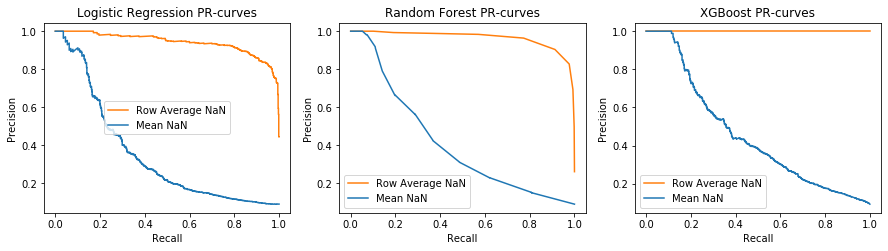

In [93]:
fig_noOutliers_mean_vs_rowAvg, (ax1_noOutliers_mean_vs_rowAvg, ax2_noOutliers_mean_vs_rowAvg, ax3_noOutliers_mean_vs_rowAvg) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_rowAvg.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_rowAvg.plot(lrc_recall_rowAvg_noOutliers, lrc_precision_rowAvg_noOutliers, color='tab:orange', label='Row Average NaN')
ax1_noOutliers_mean_vs_rowAvg.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='tab:blue', label='Mean NaN')
ax1_noOutliers_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_rowAvg.legend()

ax2_noOutliers_mean_vs_rowAvg.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_rowAvg.plot(rfc_recall_rowAvg_noOutliers, rfc_precision_rowAvg_noOutliers, color = 'tab:orange', label='Row Average NaN')
ax2_noOutliers_mean_vs_rowAvg.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax2_noOutliers_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_rowAvg.legend()

ax3_noOutliers_mean_vs_rowAvg.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_rowAvg.plot(xgb_recall_rowAvg_noOutliers, xgb_precision_rowAvg_noOutliers, color = 'tab:orange', label='Row Average NaN')
ax3_noOutliers_mean_vs_rowAvg.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax3_noOutliers_mean_vs_rowAvg.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_rowAvg.legend()

# Dataset cut by dates

## NaN col mean

### 2015-2016

In [94]:
From2015_mean = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreMean_from2015.csv')
From2015_mean = From2015_mean.drop(['Unnamed: 0'], axis = 1)
From2015_mean

,FLAG,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,6.0489,6.098814,6.18428,5.848001,5.813534,5.662838,5.742916,5.761319,5.850648,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,6.0489,6.098814,6.18428,5.848001,5.813534,5.662838,5.742916,5.761319,5.850648,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,6.0489,6.098814,6.18428,5.848001,5.813534,5.662838,5.742916,5.761319,5.850648,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,2.9200,3.320000,2.75000,2.600000,2.920000,2.040000,2.900000,3.200000,3.710000,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,6.7700,6.370000,6.17000,4.650000,4.680000,4.670000,4.340000,5.040000,5.120000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,5.3900,4.940000,6.18428,5.848001,3.850000,4.480000,4.850000,4.220000,5.430000,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.5500,6.630000,3.94000,4.420000,4.570000,2.990000,4.590000,5.100000,5.240000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.1000,0.120000,0.11000,0.110000,0.100000,0.110000,0.320000,0.130000,0.150000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,15.7600,17.910000,27.08000,19.370000,18.840000,24.680000,21.830000,24.180000,24.200000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [95]:
X_From2015_mean = From2015_mean.drop(['FLAG'], axis = 1)
Y_From2015_mean = From2015_mean['FLAG']

In [96]:
X_train_From2015_mean, X_test_From2015_mean, Y_train_From2015_mean, Y_test_From2015_mean = train_test_split(X_From2015_mean, Y_From2015_mean, test_size = 0.2, random_state = 42)

## Logistic Regression

In [97]:
start = time.time()
lrc.fit(X_train_From2015_mean,Y_train_From2015_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2015_mean = lrc.predict(X_test_From2015_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2015_mean, lrc_y_pred_From2015_mean)}")
print(f"Recall: {recall_score(Y_test_From2015_mean, lrc_y_pred_From2015_mean, average='macro')}")
print(confusion_matrix(Y_test_From2015_mean, lrc_y_pred_From2015_mean))
print(classification_report(Y_test_From2015_mean, lrc_y_pred_From2015_mean))
print(f"AUC: {roc_auc_score(Y_test_From2015_mean, lrc.predict_proba(X_test_From2015_mean)[:,1])}")

Training time: 3.1565825939178467sec
Accuracy: 0.9010627530364372
Recall: 0.5730627738937988
[[6998  184]
 [ 598  124]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7182
           1       0.40      0.17      0.24       722

    accuracy                           0.90      7904
   macro avg       0.66      0.57      0.59      7904
weighted avg       0.87      0.90      0.88      7904

AUC: 0.5930096285651032


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [98]:
lrc_probs_From2015_mean = lrc.predict_proba(X_test_From2015_mean)
lrc_probs_From2015_mean = lrc_probs_From2015_mean[:,1]
lrc_precision_From2015_mean, lrc_recall_From2015_mean, lrc_threshold_From2015_mean = precision_recall_curve(Y_test_From2015_mean, lrc_probs_From2015_mean)
lrc_f1_From2015_mean, lrc_auc_From2015_mean = f1_score(Y_test_From2015_mean, lrc_y_pred_From2015_mean), auc(lrc_recall_From2015_mean, lrc_precision_From2015_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2015_mean, lrc_auc_From2015_mean))

Logistic Regression: f1=0.241 auc=0.236


## Random Forest

In [99]:
start = time.time()
rfc.fit(X_train_From2015_mean,Y_train_From2015_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2015_mean = rfc.predict(X_test_From2015_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2015_mean, rfc_y_pred_From2015_mean)}")
print(f"Recall: {recall_score(Y_test_From2015_mean, rfc_y_pred_From2015_mean, average='macro')}")
print(confusion_matrix(Y_test_From2015_mean, rfc_y_pred_From2015_mean))
print(classification_report(Y_test_From2015_mean, rfc_y_pred_From2015_mean))
print(f"AUC: {roc_auc_score(Y_test_From2015_mean, rfc.predict_proba(X_test_From2015_mean)[:,1])}")

Training time: 10.990927457809448sec
Accuracy: 0.9153593117408907
Recall: 0.5778151519148749
[[7116   66]
 [ 603  119]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.64      0.16      0.26       722

    accuracy                           0.92      7904
   macro avg       0.78      0.58      0.61      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7314269052131714


In [100]:
rfc_probs_From2015_mean = rfc.predict_proba(X_test_From2015_mean)
rfc_probs_From2015_mean = rfc_probs_From2015_mean[:,1]
rfc_precision_From2015_mean, rfc_recall_From2015_mean, rfc_threshold_From2015_mean = precision_recall_curve(Y_test_From2015_mean, rfc_probs_From2015_mean)
rfc_f1_From2015_mean, rfc_auc_From2015_mean = f1_score(Y_test_From2015_mean, rfc_y_pred_From2015_mean), auc(rfc_recall_From2015_mean, rfc_precision_From2015_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2015_mean, rfc_auc_From2015_mean))

Logistic Regression: f1=0.262 auc=0.363


## XGBoost

In [101]:
start = time.time()
xgb.fit(X_train_From2015_mean,Y_train_From2015_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2015_mean = xgb.predict(X_test_From2015_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2015_mean, xgb_y_pred_From2015_mean)}")
print(f"Recall: {recall_score(Y_test_From2015_mean, xgb_y_pred_From2015_mean, average='macro')}")
print(confusion_matrix(Y_test_From2015_mean, xgb_y_pred_From2015_mean))
print(classification_report(Y_test_From2015_mean, xgb_y_pred_From2015_mean))
print(f"AUC: {roc_auc_score(Y_test_From2015_mean, xgb.predict_proba(X_test_From2015_mean)[:,1])}")

Training time: 59.466511964797974sec
Accuracy: 0.9189018218623481
Recall: 0.5722896422342405
[[7156   26]
 [ 615  107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.80      0.15      0.25       722

    accuracy                           0.92      7904
   macro avg       0.86      0.57      0.60      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.7954033089803609


In [102]:
xgb_probs_From2015_mean = xgb.predict_proba(X_test_From2015_mean)
xgb_probs_From2015_mean = xgb_probs_From2015_mean[:,1]
xgb_precision_From2015_mean, xgb_recall_From2015_mean, xgb_threshold_From2015_mean = precision_recall_curve(Y_test_From2015_mean, xgb_probs_From2015_mean)
xgb_f1_From2015_mean, xgb_auc_From2015_mean = f1_score(Y_test_From2015_mean, xgb_y_pred_From2015_mean), auc(xgb_recall_From2015_mean, xgb_precision_From2015_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2015_mean, xgb_auc_From2015_mean))

Logistic Regression: f1=0.250 auc=0.423


### 2016

In [103]:
From2016_mean = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreMean_from2016.csv')
From2016_mean = From2016_mean.drop(['Unnamed: 0'], axis = 1)
From2016_mean

,FLAG,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,9.200000,9.050000,9.730000,5.10,5.34,4.36,4.76,10.32,7.03,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,11.070000,12.370000,13.860000,12.91,13.11,12.31,13.64,13.47,13.56,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,19.550000,26.430000,22.630000,17.00,19.02,27.69,18.62,23.78,20.10,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,5.570000,5.600000,5.430000,4.32,4.46,4.94,4.14,4.46,5.88,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.910000,4.510000,4.810000,3.38,4.10,4.50,3.09,4.44,4.71,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,6.476098,6.350628,6.384298,3.95,3.11,2.85,2.88,3.41,5.10,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.620000,1.210000,0.990000,0.70,0.70,0.80,1.21,0.92,0.88,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,15.440000,13.440000,10.940000,13.91,14.02,13.94,13.10,14.08,14.78,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [104]:
X_From2016_mean = From2016_mean.drop(['FLAG'], axis = 1)
Y_From2016_mean = From2016_mean['FLAG']
X_data_From2016_mean = X_From2016_mean.values
Y_data_From2016_mean = Y_From2016_mean.values

In [105]:
X_train_From2016_mean, X_test_From2016_mean, Y_train_From2016_mean, Y_test_From2016_mean = train_test_split(X_From2016_mean, Y_From2016_mean, test_size = 0.2, random_state = 42)

## Logistic Regression

In [106]:
start = time.time()
lrc.fit(X_train_From2016_mean,Y_train_From2016_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2016_mean = lrc.predict(X_test_From2016_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2016_mean, lrc_y_pred_From2016_mean)}")
print(f"Recall: {recall_score(Y_test_From2016_mean, lrc_y_pred_From2016_mean, average='macro')}")
print(confusion_matrix(Y_test_From2016_mean, lrc_y_pred_From2016_mean))
print(classification_report(Y_test_From2016_mean, lrc_y_pred_From2016_mean))
print(f"AUC: {roc_auc_score(Y_test_From2016_mean, lrc.predict_proba(X_test_From2016_mean)[:,1])}")

Training time: 1.4931371212005615sec
Accuracy: 0.9121963562753036
Recall: 0.5673540576587668
[[7105   77]
 [ 617  105]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7182
           1       0.58      0.15      0.23       722

    accuracy                           0.91      7904
   macro avg       0.75      0.57      0.59      7904
weighted avg       0.89      0.91      0.89      7904

AUC: 0.6693925873470997


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [107]:
lrc_probs_From2016_mean = lrc.predict_proba(X_test_From2016_mean)
lrc_probs_From2016_mean = lrc_probs_From2016_mean[:,1]
lrc_precision_From2016_mean, lrc_recall_From2016_mean, lrc_threshold_From2016_mean = precision_recall_curve(Y_test_From2016_mean, lrc_probs_From2016_mean)
lrc_f1_From2016_mean, lrc_auc_From2016_mean = f1_score(Y_test_From2016_mean, lrc_y_pred_From2016_mean), auc(lrc_recall_From2016_mean, lrc_precision_From2016_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2016_mean, lrc_auc_From2016_mean))

Logistic Regression: f1=0.232 auc=0.289


## Random Forest

In [108]:
start = time.time()
rfc.fit(X_train_From2016_mean,Y_train_From2016_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2016_mean = rfc.predict(X_test_From2016_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2016_mean, rfc_y_pred_From2016_mean)}")
print(f"Recall: {recall_score(Y_test_From2016_mean, rfc_y_pred_From2016_mean, average='macro')}")
print(confusion_matrix(Y_test_From2016_mean, rfc_y_pred_From2016_mean))
print(classification_report(Y_test_From2016_mean, rfc_y_pred_From2016_mean))
print(f"AUC: {roc_auc_score(Y_test_From2016_mean, rfc.predict_proba(X_test_From2016_mean)[:,1])}")

Training time: 7.75758957862854sec
Accuracy: 0.9159919028340081
Recall: 0.5750487329434698
[[7126   56]
 [ 608  114]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.67      0.16      0.26       722

    accuracy                           0.92      7904
   macro avg       0.80      0.58      0.61      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.706426635224565


In [109]:
rfc_probs_From2016_mean = rfc.predict_proba(X_test_From2016_mean)
rfc_probs_From2016_mean = rfc_probs_From2016_mean[:,1]
rfc_precision_From2016_mean, rfc_recall_From2016_mean, rfc_threshold_From2016_mean = precision_recall_curve(Y_test_From2016_mean, rfc_probs_From2016_mean)
rfc_f1_From2016_mean, rfc_auc_From2016_mean = f1_score(Y_test_From2016_mean, rfc_y_pred_From2016_mean), auc(rfc_recall_From2016_mean, rfc_precision_From2016_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2016_mean, rfc_auc_From2016_mean))

Logistic Regression: f1=0.256 auc=0.347


## XGBoost

In [110]:
start = time.time()
xgb.fit(X_train_From2016_mean,Y_train_From2016_mean)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2016_mean = xgb.predict(X_test_From2016_mean)
print(f"Accuracy: {accuracy_score(Y_test_From2016_mean, xgb_y_pred_From2016_mean)}")
print(f"Recall: {recall_score(Y_test_From2016_mean, xgb_y_pred_From2016_mean, average='macro')}")
print(confusion_matrix(Y_test_From2016_mean, xgb_y_pred_From2016_mean))
print(classification_report(Y_test_From2016_mean, xgb_y_pred_From2016_mean))
print(f"AUC: {roc_auc_score(Y_test_From2016_mean, xgb.predict_proba(X_test_From2016_mean)[:,1])}")

Training time: 29.36951208114624sec
Accuracy: 0.9183957489878543
Recall: 0.5682737545618433
[[7158   24]
 [ 621  101]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.81      0.14      0.24       722

    accuracy                           0.92      7904
   macro avg       0.86      0.57      0.60      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.7728899233309496


In [111]:
xgb_probs_From2016_mean = xgb.predict_proba(X_test_From2016_mean)
xgb_probs_From2016_mean = xgb_probs_From2016_mean[:,1]
xgb_precision_From2016_mean, xgb_recall_From2016_mean, xgb_threshold_From2016_mean = precision_recall_curve(Y_test_From2016_mean, xgb_probs_From2016_mean)
xgb_f1_From2016_mean, xgb_auc_From2016_mean = f1_score(Y_test_From2016_mean, xgb_y_pred_From2016_mean), auc(xgb_recall_From2016_mean, xgb_precision_From2016_mean)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2016_mean, xgb_auc_From2016_mean))

Logistic Regression: f1=0.238 auc=0.402


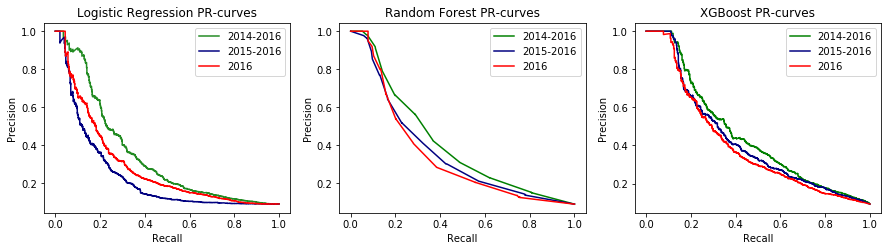

In [112]:
fig_datasets_by_year, (ax1_datasets_by_year, ax2_datasets_by_year, ax3_datasets_by_year) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_datasets_by_year.set_title('Logistic Regression PR-curves')
ax1_datasets_by_year.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='forestgreen', label='2014-2016')
ax1_datasets_by_year.plot(lrc_recall_From2015_mean, lrc_precision_From2015_mean, color='navy', label='2015-2016')
ax1_datasets_by_year.plot(lrc_recall_From2016_mean, lrc_precision_From2016_mean, color='red', label='2016')
ax1_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax1_datasets_by_year.legend()

ax2_datasets_by_year.set_title('Random Forest PR-curves')
ax2_datasets_by_year.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'green', label='2014-2016')
ax2_datasets_by_year.plot(rfc_recall_From2015_mean, rfc_precision_From2015_mean, color = 'navy', label='2015-2016')
ax2_datasets_by_year.plot(rfc_recall_From2016_mean, rfc_precision_From2016_mean, color = 'red', label='2016')
ax2_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax2_datasets_by_year.legend()

ax3_datasets_by_year.set_title('XGBoost PR-curves')
ax3_datasets_by_year.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'green', label='2014-2016')
ax3_datasets_by_year.plot(xgb_recall_From2015_mean, xgb_precision_From2015_mean, color = 'navy', label='2015-2016')
ax3_datasets_by_year.plot(xgb_recall_From2016_mean, xgb_precision_From2016_mean, color = 'red', label='2016')
ax3_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax3_datasets_by_year.legend()

## NaN random

### 2015-2016

In [113]:
From2015_random = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreRandomized_from2015.csv')
From2015_random = From2015_random.drop(['Unnamed: 0'], axis = 1)
From2015_random

,FLAG,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,1.00,199.00,171.00,58.00,74.00,90.00,8.00,59.00,68.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,56.00,122.00,149.00,146.00,85.00,167.00,80.00,4.00,67.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,103.00,85.00,33.00,1.00,44.00,87.00,171.00,97.00,36.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,2.92,3.32,2.75,2.60,2.92,2.04,2.90,3.20,3.71,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,6.77,6.37,6.17,4.65,4.68,4.67,4.34,5.04,5.12,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,5.39,4.94,87.00,2.00,3.85,4.48,4.85,4.22,5.43,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.55,6.63,3.94,4.42,4.57,2.99,4.59,5.10,5.24,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.10,0.12,0.11,0.11,0.10,0.11,0.32,0.13,0.15,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,15.76,17.91,27.08,19.37,18.84,24.68,21.83,24.18,24.20,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [114]:
X_From2015_random = From2015_random.drop(['FLAG'], axis = 1)
Y_From2015_random = From2015_random['FLAG']

In [115]:
X_train_From2015_random, X_test_From2015_random, Y_train_From2015_random, Y_test_From2015_random = train_test_split(X_From2015_random, Y_From2015_random, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [116]:
start = time.time()
lrc.fit(X_train_From2015_random,Y_train_From2015_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2015_random = lrc.predict(X_test_From2015_random)
print(f"Accuracy: {accuracy_score(Y_test_From2015_random, lrc_y_pred_From2015_random)}")
print(f"Recall: {recall_score(Y_test_From2015_random, lrc_y_pred_From2015_random, average='macro')}")
print(confusion_matrix(Y_test_From2015_random, lrc_y_pred_From2015_random))
print(classification_report(Y_test_From2015_random, lrc_y_pred_From2015_random))
print(f"AUC: {roc_auc_score(Y_test_From2015_random, lrc.predict_proba(X_test_From2015_random)[:,1])}")

Training time: 2.957310199737549sec
Accuracy: 0.8800607287449392
Recall: 0.5446877427486846
[[6859  323]
 [ 625   97]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7182
           1       0.23      0.13      0.17       722

    accuracy                           0.88      7904
   macro avg       0.57      0.54      0.55      7904
weighted avg       0.85      0.88      0.87      7904

AUC: 0.5236654656030658


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [117]:
lrc_probs_From2015_random = lrc.predict_proba(X_test_From2015_random)
lrc_probs_From2015_random = lrc_probs_From2015_random[:,1]
lrc_precision_From2015_random, lrc_recall_From2015_random, lrc_threshold_From2015_random = precision_recall_curve(Y_test_From2015_random, lrc_probs_From2015_random)
lrc_f1_From2015_random, lrc_auc_From2015_random = f1_score(Y_test_From2015_random, lrc_y_pred_From2015_random), auc(lrc_recall_From2015_random, lrc_precision_From2015_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2015_random, lrc_auc_From2015_random))

Logistic Regression: f1=0.170 auc=0.126


#### Random Forest

In [118]:
start = time.time()
rfc.fit(X_train_From2015_random,Y_train_From2015_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2015_random = rfc.predict(X_test_From2015_random)
print(f"Accuracy: {accuracy_score(Y_test_From2015_random, rfc_y_pred_From2015_random)}")
print(f"Recall: {recall_score(Y_test_From2015_random, rfc_y_pred_From2015_random, average='macro')}")
print(confusion_matrix(Y_test_From2015_random, rfc_y_pred_From2015_random))
print(classification_report(Y_test_From2015_random, rfc_y_pred_From2015_random))
print(f"AUC: {roc_auc_score(Y_test_From2015_random, rfc.predict_proba(X_test_From2015_random)[:,1])}")

Training time: 11.193615913391113sec
Accuracy: 0.916497975708502
Recall: 0.5722126954813935
[[7135   47]
 [ 613  109]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.70      0.15      0.25       722

    accuracy                           0.92      7904
   macro avg       0.81      0.57      0.60      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7218412490135774


In [119]:
rfc_probs_From2015_random = rfc.predict_proba(X_test_From2015_random)
rfc_probs_From2015_random = rfc_probs_From2015_random[:,1]
rfc_precision_From2015_random, rfc_recall_From2015_random, rfc_threshold_From2015_random = precision_recall_curve(Y_test_From2015_random, rfc_probs_From2015_random)
rfc_f1_From2015_random, rfc_auc_From2015_random = f1_score(Y_test_From2015_random, rfc_y_pred_From2015_random), auc(rfc_recall_From2015_random, rfc_precision_From2015_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2015_random, rfc_auc_From2015_random))

Logistic Regression: f1=0.248 auc=0.359


#### XGBoost

In [120]:
start = time.time()
xgb.fit(X_train_From2015_random,Y_train_From2015_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2015_random = xgb.predict(X_test_From2015_random)
print(f"Accuracy: {accuracy_score(Y_test_From2015_random, xgb_y_pred_From2015_random)}")
print(f"Recall: {recall_score(Y_test_From2015_random, xgb_y_pred_From2015_random, average='macro')}")
print(confusion_matrix(Y_test_From2015_random, xgb_y_pred_From2015_random))
print(classification_report(Y_test_From2015_random, xgb_y_pred_From2015_random))
print(f"AUC: {roc_auc_score(Y_test_From2015_random, xgb.predict_proba(X_test_From2015_random)[:,1])}")

Training time: 66.76381874084473sec
Accuracy: 0.9180161943319838
Recall: 0.5736710196543992
[[7146   36]
 [ 612  110]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.75      0.15      0.25       722

    accuracy                           0.92      7904
   macro avg       0.84      0.57      0.61      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.798335481671245


In [121]:
xgb_probs_From2015_random = xgb.predict_proba(X_test_From2015_random)
xgb_probs_From2015_random = xgb_probs_From2015_random[:,1]
xgb_precision_From2015_random, xgb_recall_From2015_random, xgb_threshold_From2015_random = precision_recall_curve(Y_test_From2015_random, xgb_probs_From2015_random)
xgb_f1_From2015_random, xgb_auc_From2015_random = f1_score(Y_test_From2015_random, xgb_y_pred_From2015_random), auc(xgb_recall_From2015_random, xgb_precision_From2015_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2015_random, xgb_auc_From2015_random))

Logistic Regression: f1=0.253 auc=0.418


### 2016

In [122]:
From2016_random = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_and_nansAreRandomized_from2016.csv')
From2016_random = From2016_random.drop(['Unnamed: 0'], axis = 1)
From2016_random

,FLAG,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,9.20,9.05,9.73,5.10,5.34,4.36,4.76,10.32,7.03,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,11.07,12.37,13.86,12.91,13.11,12.31,13.64,13.47,13.56,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,19.55,26.43,22.63,17.00,19.02,27.69,18.62,23.78,20.10,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,5.57,5.60,5.43,4.32,4.46,4.94,4.14,4.46,5.88,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.91,4.51,4.81,3.38,4.10,4.50,3.09,4.44,4.71,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,293.00,211.00,95.00,3.95,3.11,2.85,2.88,3.41,5.10,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,0.62,1.21,0.99,0.70,0.70,0.80,1.21,0.92,0.88,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,15.44,13.44,10.94,13.91,14.02,13.94,13.10,14.08,14.78,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [123]:
X_From2016_random = From2016_random.drop(['FLAG'], axis = 1)
Y_From2016_random = From2016_random['FLAG']

In [124]:
X_train_From2016_random, X_test_From2016_random, Y_train_From2016_random, Y_test_From2016_random = train_test_split(X_From2016_random, Y_From2016_random, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [125]:
start = time.time()
lrc.fit(X_train_From2016_random,Y_train_From2016_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2016_random = lrc.predict(X_test_From2016_random)
print(f"Accuracy: {accuracy_score(Y_test_From2016_random, lrc_y_pred_From2016_random)}")
print(f"Recall: {recall_score(Y_test_From2016_random, lrc_y_pred_From2016_random, average='macro')}")
print(confusion_matrix(Y_test_From2016_random, lrc_y_pred_From2016_random))
print(classification_report(Y_test_From2016_random, lrc_y_pred_From2016_random))
print(f"AUC: {roc_auc_score(Y_test_From2016_random, lrc.predict_proba(X_test_From2016_random)[:,1])}")

Training time: 1.4211852550506592sec
Accuracy: 0.9109311740890689
Recall: 0.5423646836389219
[[7134   48]
 [ 656   66]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7182
           1       0.58      0.09      0.16       722

    accuracy                           0.91      7904
   macro avg       0.75      0.54      0.56      7904
weighted avg       0.89      0.91      0.88      7904

AUC: 0.7177377114685761


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [126]:
lrc_probs_From2016_random = lrc.predict_proba(X_test_From2016_random)
lrc_probs_From2016_random = lrc_probs_From2016_random[:,1]
lrc_precision_From2016_random, lrc_recall_From2016_random, lrc_threshold_From2016_random = precision_recall_curve(Y_test_From2016_random, lrc_probs_From2016_random)
lrc_f1_From2016_random, lrc_auc_From2016_random = f1_score(Y_test_From2016_random, lrc_y_pred_From2016_random), auc(lrc_recall_From2016_random, lrc_precision_From2016_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2016_random, lrc_auc_From2016_random))

Logistic Regression: f1=0.158 auc=0.283


#### Random Forest

In [127]:
start = time.time()
rfc.fit(X_train_From2016_random,Y_train_From2016_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2016_random = rfc.predict(X_test_From2016_random)
print(f"Accuracy: {accuracy_score(Y_test_From2016_random, rfc_y_pred_From2016_random)}")
print(f"Recall: {recall_score(Y_test_From2016_random, rfc_y_pred_From2016_random, average='macro')}")
print(confusion_matrix(Y_test_From2016_random, rfc_y_pred_From2016_random))
print(classification_report(Y_test_From2016_random, rfc_y_pred_From2016_random))
print(f"AUC: {roc_auc_score(Y_test_From2016_random, rfc.predict_proba(X_test_From2016_random)[:,1])}")

Training time: 7.132946252822876sec
Accuracy: 0.9157388663967612
Recall: 0.5717949845373669
[[7129   53]
 [ 613  109]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.67      0.15      0.25       722

    accuracy                           0.92      7904
   macro avg       0.80      0.57      0.60      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7131643937482981


In [128]:
rfc_probs_From2016_random = rfc.predict_proba(X_test_From2016_random)
rfc_probs_From2016_random = rfc_probs_From2016_random[:,1]
rfc_precision_From2016_random, rfc_recall_From2016_random, rfc_threshold_From2016_random = precision_recall_curve(Y_test_From2016_random, rfc_probs_From2016_random)
rfc_f1_From2016_random, rfc_auc_From2016_random = f1_score(Y_test_From2016_random, rfc_y_pred_From2016_random), auc(rfc_recall_From2016_random, rfc_precision_From2016_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2016_random, rfc_auc_From2016_random))

Logistic Regression: f1=0.247 auc=0.338


#### XGBoost

In [129]:
start = time.time()
xgb.fit(X_train_From2016_random,Y_train_From2016_random)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2016_random = xgb.predict(X_test_From2016_random)
print(f"Accuracy: {accuracy_score(Y_test_From2016_random, xgb_y_pred_From2016_random)}")
print(f"Recall: {recall_score(Y_test_From2016_random, xgb_y_pred_From2016_random, average='macro')}")
print(confusion_matrix(Y_test_From2016_random, xgb_y_pred_From2016_random))
print(classification_report(Y_test_From2016_random, xgb_y_pred_From2016_random))
print(f"AUC: {roc_auc_score(Y_test_From2016_random, xgb.predict_proba(X_test_From2016_random)[:,1])}")

Training time: 30.31497049331665sec
Accuracy: 0.9178896761133604
Recall: 0.5704868897389673
[[7150   32]
 [ 617  105]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.77      0.15      0.24       722

    accuracy                           0.92      7904
   macro avg       0.84      0.57      0.60      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.7798584256887217


In [130]:
xgb_probs_From2016_random = xgb.predict_proba(X_test_From2016_random)
xgb_probs_From2016_random = xgb_probs_From2016_random[:,1]
xgb_precision_From2016_random, xgb_recall_From2016_random, xgb_threshold_From2016_random = precision_recall_curve(Y_test_From2016_random, xgb_probs_From2016_random)
xgb_f1_From2016_random, xgb_auc_From2016_random = f1_score(Y_test_From2016_random, xgb_y_pred_From2016_random), auc(xgb_recall_From2016_random, xgb_precision_From2016_random)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2016_random, xgb_auc_From2016_random))

Logistic Regression: f1=0.244 auc=0.401


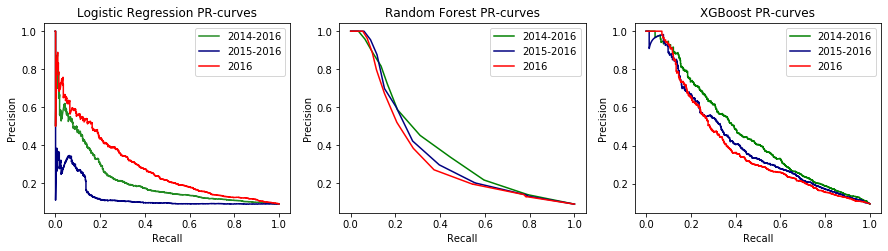

In [131]:
fig_datasets_by_year, (ax1_datasets_by_year, ax2_datasets_by_year, ax3_datasets_by_year) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_datasets_by_year.set_title('Logistic Regression PR-curves')
ax1_datasets_by_year.plot(lrc_recall_rand_noOutliers, lrc_precision_rand_noOutliers, color='forestgreen', label='2014-2016')
ax1_datasets_by_year.plot(lrc_recall_From2015_random, lrc_precision_From2015_random, color='navy', label='2015-2016')
ax1_datasets_by_year.plot(lrc_recall_From2016_random, lrc_precision_From2016_random, color='red', label='2016')
ax1_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax1_datasets_by_year.legend()

ax2_datasets_by_year.set_title('Random Forest PR-curves')
ax2_datasets_by_year.plot(rfc_recall_rand_noOutliers, rfc_precision_rand_noOutliers, color = 'green', label='2014-2016')
ax2_datasets_by_year.plot(rfc_recall_From2015_random, rfc_precision_From2015_random, color = 'navy', label='2015-2016')
ax2_datasets_by_year.plot(rfc_recall_From2016_random, rfc_precision_From2016_random, color = 'red', label='2016')
ax2_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax2_datasets_by_year.legend()

ax3_datasets_by_year.set_title('XGBoost PR-curves')
ax3_datasets_by_year.plot(xgb_recall_rand_noOutliers, xgb_precision_rand_noOutliers, color = 'green', label='2014-2016')
ax3_datasets_by_year.plot(xgb_recall_From2015_random, xgb_precision_From2015_random, color = 'navy', label='2015-2016')
ax3_datasets_by_year.plot(xgb_recall_From2016_random, xgb_precision_From2016_random, color = 'red', label='2016')
ax3_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax3_datasets_by_year.legend()

## NaN row average

### 2015-2016

In [132]:
From2015_rowAvg = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_without_outliers_rowAvg_from2015.csv')
From2015_rowAvg = From2015_rowAvg.drop(['Unnamed: 0'], axis = 1)
From2015_rowAvg

,FLAG,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1.0,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1.0,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.0,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1.0,2.920000,3.320000,2.750000,2.600000,2.920000,2.040000,2.900000,3.200000,3.710000,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1.0,6.770000,6.370000,6.170000,4.650000,4.680000,4.670000,4.340000,5.040000,5.120000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0.0,5.390000,4.940000,4.142032,4.142032,3.850000,4.480000,4.850000,4.220000,5.430000,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0.0,4.550000,6.630000,3.940000,4.420000,4.570000,2.990000,4.590000,5.100000,5.240000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0.0,0.100000,0.120000,0.110000,0.110000,0.100000,0.110000,0.320000,0.130000,0.150000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0.0,15.760000,17.910000,27.080000,19.370000,18.840000,24.680000,21.830000,24.180000,24.200000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [133]:
X_From2015_rowAvg = From2015_rowAvg.drop(['FLAG'], axis = 1)
Y_From2015_rowAvg = From2015_rowAvg['FLAG']

In [134]:
X_train_From2015_rowAvg, X_test_From2015_rowAvg, Y_train_From2015_rowAvg, Y_test_From2015_rowAvg = train_test_split(X_From2015_rowAvg, Y_From2015_rowAvg, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [135]:
start = time.time()
lrc.fit(X_train_From2015_rowAvg,Y_train_From2015_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2015_rowAvg = lrc.predict(X_test_From2015_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2015_rowAvg, lrc_y_pred_From2015_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2015_rowAvg, lrc_y_pred_From2015_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2015_rowAvg, lrc_y_pred_From2015_rowAvg))
print(classification_report(Y_test_From2015_rowAvg, lrc_y_pred_From2015_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2015_rowAvg, lrc.predict_proba(X_test_From2015_rowAvg)[:,1])}")

Training time: 2.713442087173462sec
Accuracy: 0.8963815789473685
Recall: 0.5885510560025795
[[6932  250]
 [ 569  153]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7182
         1.0       0.38      0.21      0.27       722

    accuracy                           0.90      7904
   macro avg       0.65      0.59      0.61      7904
weighted avg       0.87      0.90      0.88      7904

AUC: 0.602841938641618


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [136]:
lrc_probs_From2015_rowAvg = lrc.predict_proba(X_test_From2015_rowAvg)
lrc_probs_From2015_rowAvg = lrc_probs_From2015_rowAvg[:,1]
lrc_precision_From2015_rowAvg, lrc_recall_From2015_rowAvg, lrc_threshold_From2015_rowAvg = precision_recall_curve(Y_test_From2015_rowAvg, lrc_probs_From2015_rowAvg)
lrc_f1_From2015_rowAvg, lrc_auc_From2015_rowAvg = f1_score(Y_test_From2015_rowAvg, lrc_y_pred_From2015_rowAvg), auc(lrc_recall_From2015_rowAvg, lrc_precision_From2015_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2015_rowAvg, lrc_auc_From2015_rowAvg))

Logistic Regression: f1=0.272 auc=0.250


#### Random Forest

In [137]:
start = time.time()
rfc.fit(X_train_From2015_rowAvg,Y_train_From2015_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2015_rowAvg = rfc.predict(X_test_From2015_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2015_rowAvg, rfc_y_pred_From2015_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2015_rowAvg, rfc_y_pred_From2015_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2015_rowAvg, rfc_y_pred_From2015_rowAvg))
print(classification_report(Y_test_From2015_rowAvg, rfc_y_pred_From2015_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2015_rowAvg, rfc.predict_proba(X_test_From2015_rowAvg)[:,1])}")

Training time: 15.695406436920166sec
Accuracy: 0.9171305668016194
Recall: 0.5868875404886486
[[7117   65]
 [ 590  132]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      7182
         1.0       0.67      0.18      0.29       722

    accuracy                           0.92      7904
   macro avg       0.80      0.59      0.62      7904
weighted avg       0.90      0.92      0.89      7904

AUC: 0.7325278801805992


In [138]:
rfc_probs_From2015_rowAvg = rfc.predict_proba(X_test_From2015_rowAvg)
rfc_probs_From2015_rowAvg = rfc_probs_From2015_rowAvg[:,1]
rfc_precision_From2015_rowAvg, rfc_recall_From2015_rowAvg, rfc_threshold_From2015_rowAvg = precision_recall_curve(Y_test_From2015_rowAvg, rfc_probs_From2015_rowAvg)
rfc_f1_From2015_rowAvg, rfc_auc_From2015_rowAvg = f1_score(Y_test_From2015_rowAvg, rfc_y_pred_From2015_rowAvg), auc(rfc_recall_From2015_rowAvg, rfc_precision_From2015_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2015_rowAvg, rfc_auc_From2015_rowAvg))

Logistic Regression: f1=0.287 auc=0.373


#### XGBoost

In [139]:
start = time.time()
xgb.fit(X_train_From2015_rowAvg,Y_train_From2015_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2015_rowAvg = xgb.predict(X_test_From2015_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2015_rowAvg, xgb_y_pred_From2015_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2015_rowAvg, xgb_y_pred_From2015_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2015_rowAvg, xgb_y_pred_From2015_rowAvg))
print(classification_report(Y_test_From2015_rowAvg, xgb_y_pred_From2015_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2015_rowAvg, xgb.predict_proba(X_test_From2015_rowAvg)[:,1])}")

Training time: 77.37683701515198sec
Accuracy: 0.9187753036437247
Recall: 0.5715971214586173
[[7156   26]
 [ 616  106]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7182
         1.0       0.80      0.15      0.25       722

    accuracy                           0.92      7904
   macro avg       0.86      0.57      0.60      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.7798214951043352


In [140]:
xgb_probs_From2015_rowAvg = xgb.predict_proba(X_test_From2015_rowAvg)
xgb_probs_From2015_rowAvg = xgb_probs_From2015_rowAvg[:,1]
xgb_precision_From2015_rowAvg, xgb_recall_From2015_rowAvg, xgb_threshold_From2015_rowAvg = precision_recall_curve(Y_test_From2015_rowAvg, xgb_probs_From2015_rowAvg)
xgb_f1_From2015_rowAvg, xgb_auc_From2015_rowAvg = f1_score(Y_test_From2015_rowAvg, xgb_y_pred_From2015_rowAvg), auc(xgb_recall_From2015_rowAvg, xgb_precision_From2015_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2015_rowAvg, xgb_auc_From2015_rowAvg))

Logistic Regression: f1=0.248 auc=0.418


### 2016

In [141]:
From2016_rowAvg = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_without_outliers_rowAvg_from2016.csv')
From2016_rowAvg = From2016_rowAvg.drop(['Unnamed: 0'], axis = 1)
From2016_rowAvg

,FLAG,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1.0,9.200000,9.050000,9.730000,5.10,5.34,4.36,4.76,10.32,7.03,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.0,11.070000,12.370000,13.860000,12.91,13.11,12.31,13.64,13.47,13.56,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1.0,19.550000,26.430000,22.630000,17.00,19.02,27.69,18.62,23.78,20.10,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1.0,5.570000,5.600000,5.430000,4.32,4.46,4.94,4.14,4.46,5.88,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0.0,4.910000,4.510000,4.810000,3.38,4.10,4.50,3.09,4.44,4.71,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0.0,4.887684,4.887684,4.887684,3.95,3.11,2.85,2.88,3.41,5.10,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0.0,0.620000,1.210000,0.990000,0.70,0.70,0.80,1.21,0.92,0.88,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0.0,15.440000,13.440000,10.940000,13.91,14.02,13.94,13.10,14.08,14.78,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [142]:
X_From2016_rowAvg = From2016_rowAvg.drop(['FLAG'], axis = 1)
Y_From2016_rowAvg = From2016_rowAvg['FLAG']
X_data_From2016_rowAvg = X_From2016_rowAvg.values
Y_data_From2016_rowAvg = Y_From2016_rowAvg.values

In [143]:
X_train_From2016_rowAvg, X_test_From2016_rowAvg, Y_train_From2016_rowAvg, Y_test_From2016_rowAvg = train_test_split(X_From2016_rowAvg, Y_From2016_rowAvg, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [144]:
start = time.time()
lrc.fit(X_train_From2016_rowAvg,Y_train_From2016_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_From2016_rowAvg = lrc.predict(X_test_From2016_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2016_rowAvg, lrc_y_pred_From2016_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2016_rowAvg, lrc_y_pred_From2016_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2016_rowAvg, lrc_y_pred_From2016_rowAvg))
print(classification_report(Y_test_From2016_rowAvg, lrc_y_pred_From2016_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2016_rowAvg, lrc.predict_proba(X_test_From2016_rowAvg)[:,1])}")

Training time: 1.5261297225952148sec
Accuracy: 0.9139676113360324
Recall: 0.5558706708291196
[[7139   43]
 [ 637   85]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7182
         1.0       0.66      0.12      0.20       722

    accuracy                           0.91      7904
   macro avg       0.79      0.56      0.58      7904
weighted avg       0.89      0.91      0.89      7904

AUC: 0.6899432522518978


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [145]:
lrc_probs_From2016_rowAvg = lrc.predict_proba(X_test_From2016_rowAvg)
lrc_probs_From2016_rowAvg = lrc_probs_From2016_rowAvg[:,1]
lrc_precision_From2016_rowAvg, lrc_recall_From2016_rowAvg, lrc_threshold_From2016_rowAvg = precision_recall_curve(Y_test_From2016_rowAvg, lrc_probs_From2016_rowAvg)
lrc_f1_From2016_rowAvg, lrc_auc_From2016_rowAvg = f1_score(Y_test_From2016_rowAvg, lrc_y_pred_From2016_rowAvg), auc(lrc_recall_From2016_rowAvg, lrc_precision_From2016_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_From2016_rowAvg, lrc_auc_From2016_rowAvg))

Logistic Regression: f1=0.200 auc=0.299


#### Random Forest

In [146]:
start = time.time()
rfc.fit(X_train_From2016_rowAvg,Y_train_From2016_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_From2016_rowAvg = rfc.predict(X_test_From2016_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2016_rowAvg, rfc_y_pred_From2016_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2016_rowAvg, rfc_y_pred_From2016_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2016_rowAvg, rfc_y_pred_From2016_rowAvg))
print(classification_report(Y_test_From2016_rowAvg, rfc_y_pred_From2016_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2016_rowAvg, rfc.predict_proba(X_test_From2016_rowAvg)[:,1])}")

Training time: 8.740222215652466sec
Accuracy: 0.9143471659919028
Recall: 0.5735207902797931
[[7114   68]
 [ 609  113]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7182
         1.0       0.62      0.16      0.25       722

    accuracy                           0.91      7904
   macro avg       0.77      0.57      0.60      7904
weighted avg       0.89      0.91      0.89      7904

AUC: 0.68700924749547


In [147]:
rfc_probs_From2016_rowAvg = rfc.predict_proba(X_test_From2016_rowAvg)
rfc_probs_From2016_rowAvg = rfc_probs_From2016_rowAvg[:,1]
rfc_precision_From2016_rowAvg, rfc_recall_From2016_rowAvg, rfc_threshold_From2016_rowAvg = precision_recall_curve(Y_test_From2016_rowAvg, rfc_probs_From2016_rowAvg)
rfc_f1_From2016_rowAvg, rfc_auc_From2016_rowAvg = f1_score(Y_test_From2016_rowAvg, rfc_y_pred_From2016_rowAvg), auc(rfc_recall_From2016_rowAvg, rfc_precision_From2016_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_From2016_rowAvg, rfc_auc_From2016_rowAvg))

Logistic Regression: f1=0.250 auc=0.321


#### XGBoost

In [148]:
start = time.time()
xgb.fit(X_train_From2016_rowAvg,Y_train_From2016_rowAvg)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_From2016_rowAvg = xgb.predict(X_test_From2016_rowAvg)
print(f"Accuracy: {accuracy_score(Y_test_From2016_rowAvg, xgb_y_pred_From2016_rowAvg)}")
print(f"Recall: {recall_score(Y_test_From2016_rowAvg, xgb_y_pred_From2016_rowAvg, average='macro')}")
print(confusion_matrix(Y_test_From2016_rowAvg, xgb_y_pred_From2016_rowAvg))
print(classification_report(Y_test_From2016_rowAvg, xgb_y_pred_From2016_rowAvg))
print(f"AUC: {roc_auc_score(Y_test_From2016_rowAvg, xgb.predict_proba(X_test_From2016_rowAvg)[:,1])}")

Training time: 30.120789527893066sec
Accuracy: 0.9182692307692307
Recall: 0.5657125269313635
[[7161   21]
 [ 625   97]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7182
         1.0       0.82      0.13      0.23       722

    accuracy                           0.92      7904
   macro avg       0.87      0.57      0.59      7904
weighted avg       0.91      0.92      0.89      7904

AUC: 0.7569437212606771


In [149]:
xgb_probs_From2016_rowAvg = xgb.predict_proba(X_test_From2016_rowAvg)
xgb_probs_From2016_rowAvg = xgb_probs_From2016_rowAvg[:,1]
xgb_precision_From2016_rowAvg, xgb_recall_From2016_rowAvg, xgb_threshold_From2016_rowAvg = precision_recall_curve(Y_test_From2016_rowAvg, xgb_probs_From2016_rowAvg)
xgb_f1_From2016_rowAvg, xgb_auc_From2016_rowAvg = f1_score(Y_test_From2016_rowAvg, xgb_y_pred_From2016_rowAvg), auc(xgb_recall_From2016_rowAvg, xgb_precision_From2016_rowAvg)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_From2016_rowAvg, xgb_auc_From2016_rowAvg))

Logistic Regression: f1=0.231 auc=0.385


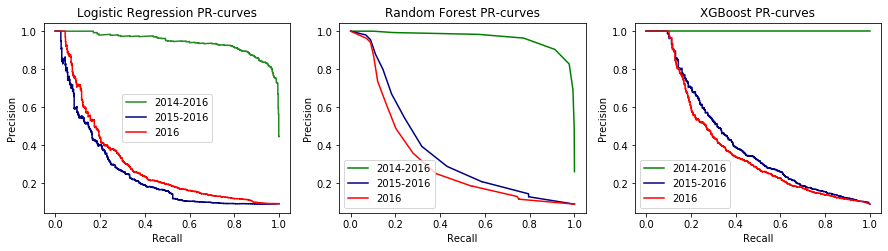

In [150]:
fig_datasets_by_year, (ax1_datasets_by_year, ax2_datasets_by_year, ax3_datasets_by_year) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_datasets_by_year.set_title('Logistic Regression PR-curves')
ax1_datasets_by_year.plot(lrc_recall_rowAvg_noOutliers, lrc_precision_rowAvg_noOutliers, color='forestgreen', label='2014-2016')
ax1_datasets_by_year.plot(lrc_recall_From2015_rowAvg, lrc_precision_From2015_rowAvg, color='navy', label='2015-2016')
ax1_datasets_by_year.plot(lrc_recall_From2016_rowAvg, lrc_precision_From2016_rowAvg, color='red', label='2016')
ax1_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax1_datasets_by_year.legend()

ax2_datasets_by_year.set_title('Random Forest PR-curves')
ax2_datasets_by_year.plot(rfc_recall_rowAvg_noOutliers, rfc_precision_rowAvg_noOutliers, color = 'green', label='2014-2016')
ax2_datasets_by_year.plot(rfc_recall_From2015_rowAvg, rfc_precision_From2015_rowAvg, color = 'navy', label='2015-2016')
ax2_datasets_by_year.plot(rfc_recall_From2016_rowAvg, rfc_precision_From2016_rowAvg, color = 'red', label='2016')
ax2_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax2_datasets_by_year.legend()

ax3_datasets_by_year.set_title('XGBoost PR-curves')
ax3_datasets_by_year.plot(xgb_recall_rowAvg_noOutliers, xgb_precision_rowAvg_noOutliers, color = 'green', label='2014-2016')
ax3_datasets_by_year.plot(xgb_recall_From2015_rowAvg, xgb_precision_From2015_rowAvg, color = 'navy', label='2015-2016')
ax3_datasets_by_year.plot(xgb_recall_From2016_rowAvg, xgb_precision_From2016_rowAvg, color = 'red', label='2016')
ax3_datasets_by_year.set(xlabel='Recall', ylabel='Precision')
ax3_datasets_by_year.legend()

# Feature engineering

## NaN Mean, added row mean and std columns

In [151]:
added_mean_std = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_with_mean_std.csv')
added_mean_std = added_mean_std.drop(['Unnamed: 0'], axis = 1)
added_mean_std

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,13.898342,8.843958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,9.921390,6.822524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,14.612055,11.422513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,8.249738,5.942354,2.90,5.64,6.99,3.32,3.61,5.35,4.73,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.147203,1.583176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.892765,1.581757,2.70,0.00,0.00,5.72,6.05,5.81,3.07,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,1.340594,1.880989,0.58,1.16,0.92,0.98,1.54,1.38,0.89,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,17.333685,6.776731,16.89,15.15,19.28,17.19,16.80,17.48,17.86,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [152]:
added_mean_std = added_mean_std.apply(lambda x: x.fillna(x.mean()),axis=0)
added_mean_std

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,13.898342,8.843958,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,9.921390,6.822524,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,14.612055,11.422513,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,8.249738,5.942354,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.147203,1.583176,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.892765,1.581757,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,1.340594,1.880989,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,17.333685,6.776731,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [153]:
X_full_added_mean_std = added_mean_std.drop(['FLAG'], axis = 1)
Y_full_added_mean_std = added_mean_std['FLAG']

In [154]:
X_train_full_added_mean_std, X_test_full_added_mean_std, Y_train_full_added_mean_std, Y_test_full_added_mean_std = train_test_split(X_full_added_mean_std, Y_full_added_mean_std, test_size = 0.2, random_state = 42)

## Logistic Regression

In [155]:
start = time.time()
lrc.fit(X_train_full_added_mean_std,Y_train_full_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_added_mean_std = lrc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, lrc_y_pred_full_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, lrc_y_pred_full_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, lrc_y_pred_full_added_mean_std))
print(classification_report(Y_test_full_added_mean_std, lrc_y_pred_full_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, lrc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Training time: 8.11580514907837sec
Accuracy: 0.9195344129554656
Recall: 0.6081431649298685
[[7104   78]
 [ 558  164]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7182
           1       0.68      0.23      0.34       722

    accuracy                           0.92      7904
   macro avg       0.80      0.61      0.65      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7638850319087964


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Random Forest

In [156]:
start = time.time()
rfc.fit(X_train_full_added_mean_std,Y_train_full_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_added_mean_std = rfc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, rfc_y_pred_full_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, rfc_y_pred_full_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, rfc_y_pred_full_added_mean_std))
print(classification_report(Y_test_full_added_mean_std, rfc_y_pred_full_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, rfc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Training time: 17.869155645370483sec
Accuracy: 0.9177631578947368
Recall: 0.5897272420818127
[[7118   64]
 [ 586  136]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7182
           1       0.68      0.19      0.30       722

    accuracy                           0.92      7904
   macro avg       0.80      0.59      0.63      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7475420430114992


## XGBoost

In [157]:
start = time.time()
xgb.fit(X_train_full_added_mean_std,Y_train_full_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_added_mean_std = xgb.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, xgb_y_pred_full_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, xgb_y_pred_full_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, xgb_y_pred_full_added_mean_std))
print(classification_report(Y_test_full_added_mean_std, xgb_y_pred_full_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, xgb.predict_proba(X_test_full_added_mean_std)[:,1])}")

Training time: 92.19385504722595sec
Accuracy: 0.9223178137651822
Recall: 0.5897418986061645
[[7158   24]
 [ 590  132]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.85      0.18      0.30       722

    accuracy                           0.92      7904
   macro avg       0.89      0.59      0.63      7904
weighted avg       0.92      0.92      0.90      7904

AUC: 0.8255139811671377


Logistic Regression: f1=0.340 auc=0.403
Random Forest: f1=0.295 auc=0.405
XGBoost: f1=0.301 auc=0.474


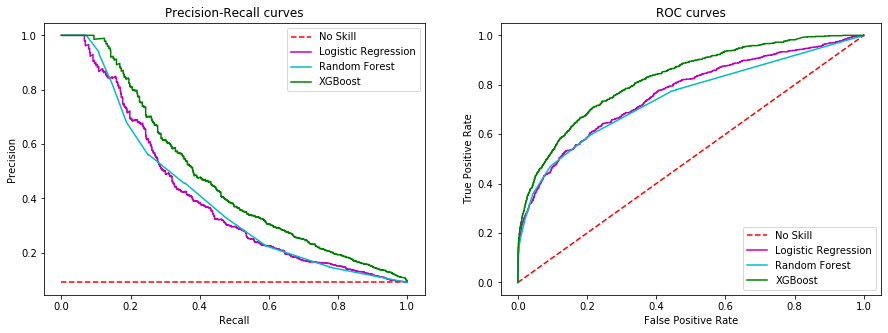

In [158]:
lrc_probs_added_mean_std = lrc.predict_proba(X_test_full_added_mean_std)
lrc_probs_added_mean_std = lrc_probs_added_mean_std[:,1]
lrc_precision_added_mean_std, lrc_recall_added_mean_std, lrc_threshold_added_mean_std = precision_recall_curve(Y_test_full_added_mean_std, lrc_probs_added_mean_std)
lrc_f1_added_mean_std, lrc_auc_added_mean_std = f1_score(Y_test_full_added_mean_std, lrc_y_pred_full_added_mean_std), auc(lrc_recall_added_mean_std, lrc_precision_added_mean_std)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_added_mean_std, lrc_auc_added_mean_std))

rfc_probs_added_mean_std = rfc.predict_proba(X_test_full_added_mean_std)
rfc_probs_added_mean_std = rfc_probs_added_mean_std[:,1]
rfc_precision_added_mean_std, rfc_recall_added_mean_std, rfc_threshold_added_mean_std = precision_recall_curve(Y_test_full_added_mean_std, rfc_probs_added_mean_std)
rfc_f1_added_mean_std, rfc_auc_added_mean_std = f1_score(Y_test_full_added_mean_std, rfc_y_pred_full_added_mean_std), auc(rfc_recall_added_mean_std, rfc_precision_added_mean_std)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_added_mean_std, rfc_auc_added_mean_std))

xgb_probs_added_mean_std = xgb.predict_proba(X_test_full_added_mean_std)
xgb_probs_added_mean_std = xgb_probs_added_mean_std[:,1]
xgb_precision_added_mean_std, xgb_recall_added_mean_std, xgb_threshold_added_mean_std = precision_recall_curve(Y_test_full_added_mean_std, xgb_probs_added_mean_std)
xgb_f1_added_mean_std, xgb_auc_added_mean_std = f1_score(Y_test_full_added_mean_std, xgb_y_pred_full_added_mean_std), auc(xgb_recall_added_mean_std, xgb_precision_added_mean_std)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_added_mean_std, xgb_auc_added_mean_std))

fig_added_mean_std, (ax1_added_mean_std, ax2_added_mean_std) = plt.subplots(1, 2, figsize=(15,5))

ax1_added_mean_std.set_title('Precision-Recall curves')
no_skill_added_mean_std = len(Y_test_full_added_mean_std[Y_test_full_added_mean_std==1]) / len(Y_test_full_added_mean_std)
ax1_added_mean_std.plot([0, 1], [no_skill_added_mean_std, no_skill_added_mean_std], linestyle='--', color = 'r', label='No Skill')
ax1_added_mean_std.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='m', label='Logistic Regression')
ax1_added_mean_std.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'c', label='Random Forest')
ax1_added_mean_std.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'g', label='XGBoost')

ax1_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax1_added_mean_std.legend()

lrc_fpr_added_mean_std, lrc_tpr_added_mean_std, _ = roc_curve(Y_test_full_added_mean_std, lrc_probs_added_mean_std)
rfc_fpr_added_mean_std, rfc_tpr_added_mean_std, _ = roc_curve(Y_test_full_added_mean_std, rfc_probs_added_mean_std)
xgb_fpr_added_mean_std, xgb_tpr_added_mean_std, _ = roc_curve(Y_test_full_added_mean_std, xgb_probs_added_mean_std)

ax2_added_mean_std.set_title('ROC curves')

ax2_added_mean_std.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_added_mean_std.plot(lrc_fpr_added_mean_std, lrc_tpr_added_mean_std, color='m', label='Logistic Regression')
ax2_added_mean_std.plot(rfc_fpr_added_mean_std, rfc_tpr_added_mean_std, color = 'c', label='Random Forest')
ax2_added_mean_std.plot(xgb_fpr_added_mean_std, xgb_tpr_added_mean_std, color = 'g', label='XGBoost')

ax2_added_mean_std.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_added_mean_std.legend()

pyplot.show()

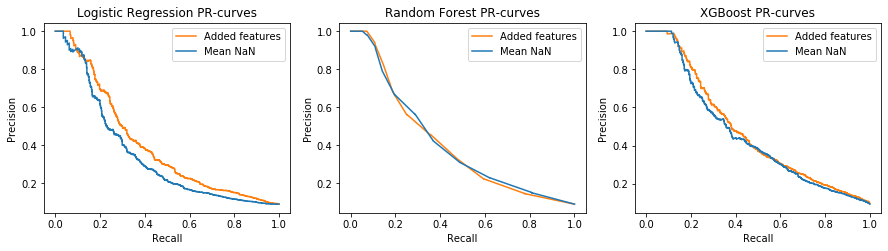

In [159]:
fig_noOutliers_mean_vs_added_mean_std, (ax1_noOutliers_mean_vs_added_mean_std, ax2_noOutliers_mean_vs_added_mean_std, ax3_noOutliers_mean_vs_added_mean_std) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_added_mean_std.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_added_mean_std.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='tab:orange', label='Added features')
ax1_noOutliers_mean_vs_added_mean_std.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='tab:blue', label='Mean NaN')
ax1_noOutliers_mean_vs_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_added_mean_std.legend()

ax2_noOutliers_mean_vs_added_mean_std.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_added_mean_std.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'tab:orange', label='Added features')
ax2_noOutliers_mean_vs_added_mean_std.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax2_noOutliers_mean_vs_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_added_mean_std.legend()

ax3_noOutliers_mean_vs_added_mean_std.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_added_mean_std.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'tab:orange', label='Added features')
ax3_noOutliers_mean_vs_added_mean_std.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color = 'tab:blue', label='Mean NaN')
ax3_noOutliers_mean_vs_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_added_mean_std.legend()


## NaN row Avg, added row mean and std columns

In [160]:
rowAvg_added_mean_std = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_rowAvg_with_mean_std.csv')
rowAvg_added_mean_std = rowAvg_added_mean_std.drop(['Unnamed: 0'], axis = 1)
rowAvg_added_mean_std

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1.0,13.889007,6.683794,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1.0,0.002315,0.001494,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,0.003279,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.0,9.895672,3.409643,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,9.887077,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1.0,14.596414,7.712989,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,14.583277,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1.0,8.249711,5.930837,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0.0,4.146038,1.393236,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,4.142032,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0.0,4.892411,1.525638,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0.0,1.340585,1.874605,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0.0,17.331213,6.325452,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [161]:
X_full_rowAvg_added_mean_std = rowAvg_added_mean_std.drop(['FLAG'], axis = 1)
Y_full_rowAvg_added_mean_std = rowAvg_added_mean_std['FLAG']
X_data_full_rowAvg_added_mean_std = X_full_rowAvg_added_mean_std.values
Y_data_full_rowAvg_added_mean_std = Y_full_rowAvg_added_mean_std.values

In [162]:
X_train_full_rowAvg_added_mean_std, X_test_full_rowAvg_added_mean_std, Y_train_full_rowAvg_added_mean_std, Y_test_full_rowAvg_added_mean_std = train_test_split(X_full_rowAvg_added_mean_std, Y_full_rowAvg_added_mean_std, test_size = 0.2, random_state = 42)

### Logistic Regression

In [163]:
start = time.time()
lrc.fit(X_train_full_rowAvg_added_mean_std,Y_train_full_rowAvg_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_rowAvg_added_mean_std = lrc.predict(X_test_full_rowAvg_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_added_mean_std, lrc_y_pred_full_rowAvg_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_added_mean_std, lrc_y_pred_full_rowAvg_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_added_mean_std, lrc_y_pred_full_rowAvg_added_mean_std))
print(classification_report(Y_test_full_rowAvg_added_mean_std, lrc_y_pred_full_rowAvg_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_added_mean_std, lrc.predict_proba(X_test_full_rowAvg_added_mean_std)[:,1])}")

Training time: 4.457456111907959sec
Accuracy: 0.8973937246963563
Recall: 0.5803873719386184
[[6954  228]
 [ 583  139]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7182
         1.0       0.38      0.19      0.26       722

    accuracy                           0.90      7904
   macro avg       0.65      0.58      0.60      7904
weighted avg       0.87      0.90      0.88      7904

AUC: 0.5723582964798886


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Random Forest

In [164]:
start = time.time()
rfc.fit(X_train_full_rowAvg_added_mean_std,Y_train_full_rowAvg_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_rowAvg_added_mean_std = rfc.predict(X_test_full_rowAvg_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_added_mean_std, rfc_y_pred_full_rowAvg_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_added_mean_std, rfc_y_pred_full_rowAvg_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_added_mean_std, rfc_y_pred_full_rowAvg_added_mean_std))
print(classification_report(Y_test_full_rowAvg_added_mean_std, rfc_y_pred_full_rowAvg_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_added_mean_std, rfc.predict_proba(X_test_full_rowAvg_added_mean_std)[:,1])}")

Training time: 20.775166511535645sec
Accuracy: 0.9185222672064778
Recall: 0.5963739758753609
[[7114   68]
 [ 576  146]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7182
         1.0       0.68      0.20      0.31       722

    accuracy                           0.92      7904
   macro avg       0.80      0.60      0.63      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7703960964275878


### XGBoost

In [165]:
start = time.time()
xgb.fit(X_train_full_rowAvg_added_mean_std,Y_train_full_rowAvg_added_mean_std)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_rowAvg_added_mean_std = xgb.predict(X_test_full_rowAvg_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_rowAvg_added_mean_std, xgb_y_pred_full_rowAvg_added_mean_std)}")
print(f"Recall: {recall_score(Y_test_full_rowAvg_added_mean_std, xgb_y_pred_full_rowAvg_added_mean_std, average='macro')}")
print(confusion_matrix(Y_test_full_rowAvg_added_mean_std, xgb_y_pred_full_rowAvg_added_mean_std))
print(classification_report(Y_test_full_rowAvg_added_mean_std, xgb_y_pred_full_rowAvg_added_mean_std))
print(f"AUC: {roc_auc_score(Y_test_full_rowAvg_added_mean_std, xgb.predict_proba(X_test_full_rowAvg_added_mean_std)[:,1])}")

Training time: 125.91103339195251sec
Accuracy: 0.9219382591093117
Recall: 0.5901559454191033
[[7154   28]
 [ 589  133]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7182
         1.0       0.83      0.18      0.30       722

    accuracy                           0.92      7904
   macro avg       0.88      0.59      0.63      7904
weighted avg       0.91      0.92      0.90      7904

AUC: 0.8063483578135859


Logistic Regression: f1=0.255 auc=0.229
Random Forest: f1=0.312 auc=0.417
XGBoost: f1=0.301 auc=0.453


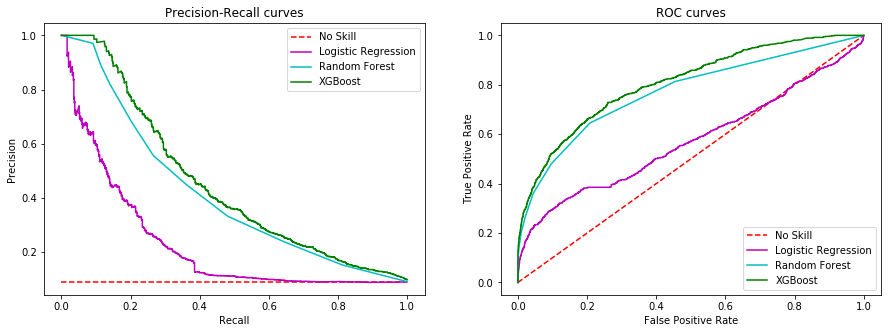

In [166]:
lrc_probs_rowAvg_added_mean_std = lrc.predict_proba(X_test_full_rowAvg_added_mean_std)
lrc_probs_rowAvg_added_mean_std = lrc_probs_rowAvg_added_mean_std[:,1]
lrc_precision_rowAvg_added_mean_std, lrc_recall_rowAvg_added_mean_std, lrc_threshold_rowAvg_added_mean_std = precision_recall_curve(Y_test_full_rowAvg_added_mean_std, lrc_probs_rowAvg_added_mean_std)
lrc_f1_rowAvg_added_mean_std, lrc_auc_rowAvg_added_mean_std = f1_score(Y_test_full_rowAvg_added_mean_std, lrc_y_pred_full_rowAvg_added_mean_std), auc(lrc_recall_rowAvg_added_mean_std, lrc_precision_rowAvg_added_mean_std)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_rowAvg_added_mean_std, lrc_auc_rowAvg_added_mean_std))

rfc_probs_rowAvg_added_mean_std = rfc.predict_proba(X_test_full_rowAvg_added_mean_std)
rfc_probs_rowAvg_added_mean_std = rfc_probs_rowAvg_added_mean_std[:,1]
rfc_precision_rowAvg_added_mean_std, rfc_recall_rowAvg_added_mean_std, rfc_threshold_rowAvg_added_mean_std = precision_recall_curve(Y_test_full_rowAvg_added_mean_std, rfc_probs_rowAvg_added_mean_std)
rfc_f1_rowAvg_added_mean_std, rfc_auc_rowAvg_added_mean_std = f1_score(Y_test_full_rowAvg_added_mean_std, rfc_y_pred_full_rowAvg_added_mean_std), auc(rfc_recall_rowAvg_added_mean_std, rfc_precision_rowAvg_added_mean_std)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_rowAvg_added_mean_std, rfc_auc_rowAvg_added_mean_std))

xgb_probs_rowAvg_added_mean_std = xgb.predict_proba(X_test_full_rowAvg_added_mean_std)
xgb_probs_rowAvg_added_mean_std = xgb_probs_rowAvg_added_mean_std[:,1]
xgb_precision_rowAvg_added_mean_std, xgb_recall_rowAvg_added_mean_std, xgb_threshold_rowAvg_added_mean_std = precision_recall_curve(Y_test_full_rowAvg_added_mean_std, xgb_probs_rowAvg_added_mean_std)
xgb_f1_rowAvg_added_mean_std, xgb_auc_rowAvg_added_mean_std = f1_score(Y_test_full_rowAvg_added_mean_std, xgb_y_pred_full_rowAvg_added_mean_std), auc(xgb_recall_rowAvg_added_mean_std, xgb_precision_rowAvg_added_mean_std)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_rowAvg_added_mean_std, xgb_auc_rowAvg_added_mean_std))

fig_rowAvg_added_mean_std, (ax1_rowAvg_added_mean_std, ax2_rowAvg_added_mean_std) = plt.subplots(1, 2, figsize=(15,5))

ax1_rowAvg_added_mean_std.set_title('Precision-Recall curves')
no_skill_rowAvg_added_mean_std = len(Y_test_full_rowAvg_added_mean_std[Y_test_full_rowAvg_added_mean_std==1]) / len(Y_test_full_rowAvg_added_mean_std)
ax1_rowAvg_added_mean_std.plot([0, 1], [no_skill_rowAvg_added_mean_std, no_skill_rowAvg_added_mean_std], linestyle='--', color = 'r', label='No Skill')
ax1_rowAvg_added_mean_std.plot(lrc_recall_rowAvg_added_mean_std, lrc_precision_rowAvg_added_mean_std, color='m', label='Logistic Regression')
ax1_rowAvg_added_mean_std.plot(rfc_recall_rowAvg_added_mean_std, rfc_precision_rowAvg_added_mean_std, color = 'c', label='Random Forest')
ax1_rowAvg_added_mean_std.plot(xgb_recall_rowAvg_added_mean_std, xgb_precision_rowAvg_added_mean_std, color = 'g', label='XGBoost')

ax1_rowAvg_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax1_rowAvg_added_mean_std.legend()

lrc_fpr_rowAvg_added_mean_std, lrc_tpr_rowAvg_added_mean_std, _ = roc_curve(Y_test_full_rowAvg_added_mean_std, lrc_probs_rowAvg_added_mean_std)
rfc_fpr_rowAvg_added_mean_std, rfc_tpr_rowAvg_added_mean_std, _ = roc_curve(Y_test_full_rowAvg_added_mean_std, rfc_probs_rowAvg_added_mean_std)
xgb_fpr_rowAvg_added_mean_std, xgb_tpr_rowAvg_added_mean_std, _ = roc_curve(Y_test_full_rowAvg_added_mean_std, xgb_probs_rowAvg_added_mean_std)

ax2_rowAvg_added_mean_std.set_title('ROC curves')

ax2_rowAvg_added_mean_std.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_rowAvg_added_mean_std.plot(lrc_fpr_rowAvg_added_mean_std, lrc_tpr_rowAvg_added_mean_std, color='m', label='Logistic Regression')
ax2_rowAvg_added_mean_std.plot(rfc_fpr_rowAvg_added_mean_std, rfc_tpr_rowAvg_added_mean_std, color = 'c', label='Random Forest')
ax2_rowAvg_added_mean_std.plot(xgb_fpr_rowAvg_added_mean_std, xgb_tpr_rowAvg_added_mean_std, color = 'g', label='XGBoost')

ax2_rowAvg_added_mean_std.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_rowAvg_added_mean_std.legend()

pyplot.show()

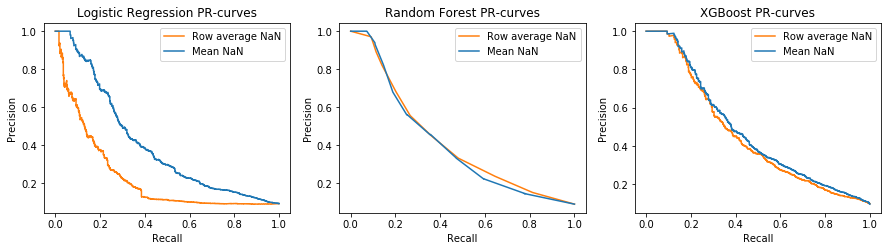

In [167]:
fig_added_mean_std_vs_rowAvg_added_mean_std, (ax1_added_mean_std_vs_rowAvg_added_mean_std, ax2_added_mean_std_vs_rowAvg_added_mean_std, ax3_added_mean_std_vs_rowAvg_added_mean_std) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_added_mean_std_vs_rowAvg_added_mean_std.set_title('Logistic Regression PR-curves')
ax1_added_mean_std_vs_rowAvg_added_mean_std.plot(lrc_recall_rowAvg_added_mean_std, lrc_precision_rowAvg_added_mean_std, color='tab:orange', label='Row average NaN')
ax1_added_mean_std_vs_rowAvg_added_mean_std.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='tab:blue', label='Mean NaN')
ax1_added_mean_std_vs_rowAvg_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax1_added_mean_std_vs_rowAvg_added_mean_std.legend()

ax2_added_mean_std_vs_rowAvg_added_mean_std.set_title('Random Forest PR-curves')
ax2_added_mean_std_vs_rowAvg_added_mean_std.plot(rfc_recall_rowAvg_added_mean_std, rfc_precision_rowAvg_added_mean_std, color = 'tab:orange', label='Row average NaN')
ax2_added_mean_std_vs_rowAvg_added_mean_std.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax2_added_mean_std_vs_rowAvg_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax2_added_mean_std_vs_rowAvg_added_mean_std.legend()

ax3_added_mean_std_vs_rowAvg_added_mean_std.set_title('XGBoost PR-curves')
ax3_added_mean_std_vs_rowAvg_added_mean_std.plot(xgb_recall_rowAvg_added_mean_std, xgb_precision_rowAvg_added_mean_std, color = 'tab:orange', label='Row average NaN')
ax3_added_mean_std_vs_rowAvg_added_mean_std.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax3_added_mean_std_vs_rowAvg_added_mean_std.set(xlabel='Recall', ylabel='Precision')
ax3_added_mean_std_vs_rowAvg_added_mean_std.legend()

## Relative difference dataset

In [168]:
t_t1 = pd.read_csv('C:/Users/boont/Desktop/szakdoga/relative_diff.csv')
t_t1

,FLAG,1/2/2014 0:00,1/3/2014 0:00,1/4/2014 0:00,1/5/2014 0:00,1/6/2014 0:00,1/7/2014 0:00,1/8/2014 0:00,1/9/2014 0:00,1/10/2014 0:00,...,10/22/2016 0:00,10/23/2016 0:00,10/24/2016 0:00,10/25/2016 0:00,10/26/2016 0:00,10/27/2016 0:00,10/28/2016 0:00,10/29/2016 0:00,10/30/2016 0:00,10/31/2016 0:00
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.137876,0.123955,0.002478,0.177998,-0.424974,0.596715,0.062857,-0.189247,0.214854,-0.264192
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.463235,0.639269,-0.006685,-0.029164,0.238590,-0.109608,-0.027763,-0.124461,-0.126154,-0.038028
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069282,0.180328,0.141534,-0.136153,0.313883,0.061256,-0.136604,0.072981,-0.249221,-0.189488
4,1,0.944828,0.239362,-0.525036,0.087349,0.481994,-0.115888,-0.221987,-0.040761,-0.031161,...,0.796460,-0.280788,-0.171233,-0.278630,-0.001637,0.103279,0.117385,0.448138,-0.094582,-0.115619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.048077,-0.051988,-0.112903,0.094545,-0.006645,-0.053512,-0.102473,0.338583,0.055882,-0.292479
39515,0,-1.000000,NaN,NaN,0.057692,-0.039669,-0.471601,0.315961,0.405941,-0.227113,...,0.057851,0.723958,-0.528701,0.653846,-0.298450,0.281768,-0.200431,0.676550,-0.027331,-0.211570
39516,0,1.000000,-0.206897,0.065217,0.571429,-0.103896,-0.355072,-0.213483,0.757143,-0.317073,...,0.375000,-0.383838,0.065574,-0.153846,-0.109091,0.040816,0.549020,-0.164557,-0.409091,0.666667
39517,0,-0.103020,0.272607,-0.108402,-0.022688,0.040476,0.021739,0.343225,-0.485619,0.121556,...,0.449490,0.053708,-0.208738,-0.203221,0.154957,-0.070833,0.095964,0.076923,0.012918,-0.220555


In [169]:
t_t1 = t_t1.apply(lambda x: x.fillna(x.mean()),axis=0)
t_t1

,FLAG,1/2/2014 0:00,1/3/2014 0:00,1/4/2014 0:00,1/5/2014 0:00,1/6/2014 0:00,1/7/2014 0:00,1/8/2014 0:00,1/9/2014 0:00,1/10/2014 0:00,...,10/22/2016 0:00,10/23/2016 0:00,10/24/2016 0:00,10/25/2016 0:00,10/26/2016 0:00,10/27/2016 0:00,10/28/2016 0:00,10/29/2016 0:00,10/30/2016 0:00,10/31/2016 0:00
0,1,0.347786,0.052761,0.197919,0.123569,0.227759,0.220619,0.134560,0.220571,0.171782,...,0.137876,0.123955,0.002478,0.177998,-0.424974,0.596715,0.062857,-0.189247,0.214854,-0.264192
1,1,0.347786,0.052761,0.197919,0.123569,0.227759,0.220619,0.134560,0.220571,0.171782,...,0.466701,0.255512,0.089243,0.245770,0.211167,0.211135,0.181556,0.241294,0.096477,0.178579
2,1,0.347786,0.052761,0.197919,0.123569,0.227759,0.220619,0.134560,0.220571,0.171782,...,-0.463235,0.639269,-0.006685,-0.029164,0.238590,-0.109608,-0.027763,-0.124461,-0.126154,-0.038028
3,1,0.347786,0.052761,0.197919,0.123569,0.227759,0.220619,0.134560,0.220571,0.171782,...,0.069282,0.180328,0.141534,-0.136153,0.313883,0.061256,-0.136604,0.072981,-0.249221,-0.189488
4,1,0.944828,0.239362,-0.525036,0.087349,0.481994,-0.115888,-0.221987,-0.040761,-0.031161,...,0.796460,-0.280788,-0.171233,-0.278630,-0.001637,0.103279,0.117385,0.448138,-0.094582,-0.115619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,0.347786,0.052761,0.197919,0.123569,0.227759,0.220619,0.134560,0.220571,0.171782,...,0.048077,-0.051988,-0.112903,0.094545,-0.006645,-0.053512,-0.102473,0.338583,0.055882,-0.292479
39515,0,-1.000000,0.052761,0.197919,0.057692,-0.039669,-0.471601,0.315961,0.405941,-0.227113,...,0.057851,0.723958,-0.528701,0.653846,-0.298450,0.281768,-0.200431,0.676550,-0.027331,-0.211570
39516,0,1.000000,-0.206897,0.065217,0.571429,-0.103896,-0.355072,-0.213483,0.757143,-0.317073,...,0.375000,-0.383838,0.065574,-0.153846,-0.109091,0.040816,0.549020,-0.164557,-0.409091,0.666667
39517,0,-0.103020,0.272607,-0.108402,-0.022688,0.040476,0.021739,0.343225,-0.485619,0.121556,...,0.449490,0.053708,-0.208738,-0.203221,0.154957,-0.070833,0.095964,0.076923,0.012918,-0.220555


In [170]:
X_full_t_t1 = t_t1.drop(['FLAG'], axis = 1)
Y_full_t_t1 = t_t1['FLAG']
X_data_full_t_t1 = X_full_t_t1.values
Y_data_full_t_t1 = Y_full_t_t1.values

In [171]:
X_train_full_t_t1, X_test_full_t_t1, Y_train_full_t_t1, Y_test_full_t_t1 = train_test_split(X_full_t_t1, Y_full_t_t1, test_size = 0.2, random_state = 42)

### Logistic Regression

In [172]:
start = time.time()
lrc.fit(X_train_full_t_t1,Y_train_full_t_t1)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_y_pred_full_t_t1 = lrc.predict(X_test_full_t_t1)
print(f"Accuracy: {accuracy_score(Y_test_full_t_t1, lrc_y_pred_full_t_t1)}")
print(f"Recall: {recall_score(Y_test_full_t_t1, lrc_y_pred_full_t_t1, average='macro')}")
print(confusion_matrix(Y_test_full_t_t1, lrc_y_pred_full_t_t1))
print(classification_report(Y_test_full_t_t1, lrc_y_pred_full_t_t1))
print(f"AUC: {roc_auc_score(Y_test_full_t_t1, lrc.predict_proba(X_test_full_t_t1)[:,1])}")

Training time: 4.21759033203125sec
Accuracy: 0.8965080971659919
Recall: 0.5082662797344237
[[7062  120]
 [ 698   24]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7182
           1       0.17      0.03      0.06       722

    accuracy                           0.90      7904
   macro avg       0.54      0.51      0.50      7904
weighted avg       0.84      0.90      0.86      7904

AUC: 0.5901244146068465


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Random Forest

In [173]:
start = time.time()
rfc.fit(X_train_full_t_t1,Y_train_full_t_t1)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
rfc_y_pred_full_t_t1 = rfc.predict(X_test_full_t_t1)
print(f"Accuracy: {accuracy_score(Y_test_full_t_t1, rfc_y_pred_full_t_t1)}")
print(f"Recall: {recall_score(Y_test_full_t_t1, rfc_y_pred_full_t_t1, average='macro')}")
print(confusion_matrix(Y_test_full_t_t1, rfc_y_pred_full_t_t1))
print(classification_report(Y_test_full_t_t1, rfc_y_pred_full_t_t1))
print(f"AUC: {roc_auc_score(Y_test_full_t_t1, rfc.predict_proba(X_test_full_t_t1)[:,1])}")

Training time: 12.177440166473389sec
Accuracy: 0.9044787449392713
Recall: 0.5051774172272787
[[7137   45]
 [ 710   12]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7182
           1       0.21      0.02      0.03       722

    accuracy                           0.90      7904
   macro avg       0.56      0.51      0.49      7904
weighted avg       0.85      0.90      0.87      7904

AUC: 0.5723577179328747


### XGBoost

In [174]:
start = time.time()
xgb.fit(X_train_full_t_t1,Y_train_full_t_t1)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
xgb_y_pred_full_t_t1 = xgb.predict(X_test_full_t_t1)
print(f"Accuracy: {accuracy_score(Y_test_full_t_t1, xgb_y_pred_full_t_t1)}")
print(f"Recall: {recall_score(Y_test_full_t_t1, xgb_y_pred_full_t_t1, average='macro')}")
print(confusion_matrix(Y_test_full_t_t1, xgb_y_pred_full_t_t1))
print(classification_report(Y_test_full_t_t1, xgb_y_pred_full_t_t1))
print(f"AUC: {roc_auc_score(Y_test_full_t_t1, xgb.predict_proba(X_test_full_t_t1)[:,1])}")

Training time: 132.61198925971985sec
Accuracy: 0.909665991902834
Recall: 0.5055401662049861
[[7182    0]
 [ 714    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7182
           1       1.00      0.01      0.02       722

    accuracy                           0.91      7904
   macro avg       0.95      0.51      0.49      7904
weighted avg       0.92      0.91      0.87      7904

AUC: 0.7054206383919169


Logistic Regression: f1=0.055 auc=0.131
Random Forest: f1=0.031 auc=0.119
XGBoost: f1=0.022 auc=0.256


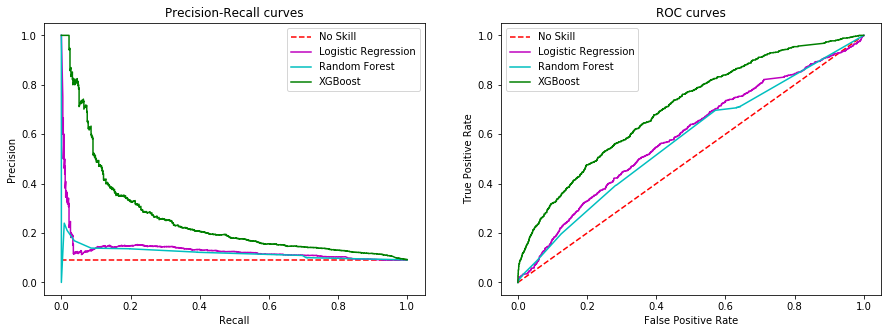

In [175]:
lrc_probs_t_t1 = lrc.predict_proba(X_test_full_t_t1)
lrc_probs_t_t1 = lrc_probs_t_t1[:,1]
lrc_precision_t_t1, lrc_recall_t_t1, lrc_threshold_t_t1 = precision_recall_curve(Y_test_full_t_t1, lrc_probs_t_t1)
lrc_f1_t_t1, lrc_auc_t_t1 = f1_score(Y_test_full_t_t1, lrc_y_pred_full_t_t1), auc(lrc_recall_t_t1, lrc_precision_t_t1)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_t_t1, lrc_auc_t_t1))

rfc_probs_t_t1 = rfc.predict_proba(X_test_full_t_t1)
rfc_probs_t_t1 = rfc_probs_t_t1[:,1]
rfc_precision_t_t1, rfc_recall_t_t1, rfc_threshold_t_t1 = precision_recall_curve(Y_test_full_t_t1, rfc_probs_t_t1)
rfc_f1_t_t1, rfc_auc_t_t1 = f1_score(Y_test_full_t_t1, rfc_y_pred_full_t_t1), auc(rfc_recall_t_t1, rfc_precision_t_t1)
print('Random Forest: f1=%.3f auc=%.3f' % (rfc_f1_t_t1, rfc_auc_t_t1))

xgb_probs_t_t1 = xgb.predict_proba(X_test_full_t_t1)
xgb_probs_t_t1 = xgb_probs_t_t1[:,1]
xgb_precision_t_t1, xgb_recall_t_t1, xgb_threshold_t_t1 = precision_recall_curve(Y_test_full_t_t1, xgb_probs_t_t1)
xgb_f1_t_t1, xgb_auc_t_t1 = f1_score(Y_test_full_t_t1, xgb_y_pred_full_t_t1), auc(xgb_recall_t_t1, xgb_precision_t_t1)
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1_t_t1, xgb_auc_t_t1))

fig_t_t1, (ax1_t_t1, ax2_t_t1) = plt.subplots(1, 2, figsize=(15,5))

ax1_t_t1.set_title('Precision-Recall curves')
no_skill_t_t1 = len(Y_test_full_t_t1[Y_test_full_t_t1==1]) / len(Y_test_full_t_t1)
ax1_t_t1.plot([0, 1], [no_skill_t_t1, no_skill_t_t1], linestyle='--', color = 'r', label='No Skill')
ax1_t_t1.plot(lrc_recall_t_t1, lrc_precision_t_t1, color='m', label='Logistic Regression')
ax1_t_t1.plot(rfc_recall_t_t1, rfc_precision_t_t1, color = 'c', label='Random Forest')
ax1_t_t1.plot(xgb_recall_t_t1, xgb_precision_t_t1, color = 'g', label='XGBoost')

ax1_t_t1.set(xlabel='Recall', ylabel='Precision')
ax1_t_t1.legend()

lrc_fpr_t_t1, lrc_tpr_t_t1, _ = roc_curve(Y_test_full_t_t1, lrc_probs_t_t1)
rfc_fpr_t_t1, rfc_tpr_t_t1, _ = roc_curve(Y_test_full_t_t1, rfc_probs_t_t1)
xgb_fpr_t_t1, xgb_tpr_t_t1, _ = roc_curve(Y_test_full_t_t1, xgb_probs_t_t1)

ax2_t_t1.set_title('ROC curves')
ax2_t_t1.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_t_t1.plot(lrc_fpr_t_t1, lrc_tpr_t_t1, color='m', label='Logistic Regression')
ax2_t_t1.plot(rfc_fpr_t_t1, rfc_tpr_t_t1, color = 'c', label='Random Forest')
ax2_t_t1.plot(xgb_fpr_t_t1, xgb_tpr_t_t1, color = 'g', label='XGBoost')

ax2_t_t1.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_t_t1.legend()

pyplot.show()

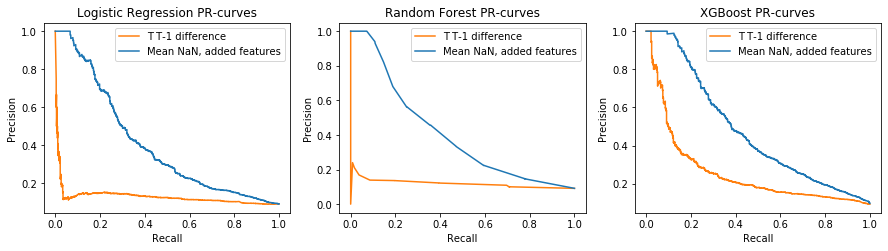

In [176]:
fig_added_mean_std_vs_t_t1, (ax1_added_mean_std_vs_t_t1, ax2_added_mean_std_vs_t_t1, ax3_added_mean_std_vs_t_t1) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_added_mean_std_vs_t_t1.set_title('Logistic Regression PR-curves')
ax1_added_mean_std_vs_t_t1.plot(lrc_recall_t_t1, lrc_precision_t_t1, color='tab:orange', label='T T-1 difference')
ax1_added_mean_std_vs_t_t1.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='tab:blue', label='Mean NaN, added features')
ax1_added_mean_std_vs_t_t1.set(xlabel='Recall', ylabel='Precision')
ax1_added_mean_std_vs_t_t1.legend()

ax2_added_mean_std_vs_t_t1.set_title('Random Forest PR-curves')
ax2_added_mean_std_vs_t_t1.plot(rfc_recall_t_t1, rfc_precision_t_t1, color = 'tab:orange', label='T T-1 difference')
ax2_added_mean_std_vs_t_t1.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'tab:blue', label='Mean NaN, added features')
ax2_added_mean_std_vs_t_t1.set(xlabel='Recall', ylabel='Precision')
ax2_added_mean_std_vs_t_t1.legend()

ax3_added_mean_std_vs_t_t1.set_title('XGBoost PR-curves')
ax3_added_mean_std_vs_t_t1.plot(xgb_recall_t_t1, xgb_precision_t_t1, color = 'tab:orange', label='T T-1 difference')
ax3_added_mean_std_vs_t_t1.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'tab:blue', label='Mean NaN, added features')
ax3_added_mean_std_vs_t_t1.set(xlabel='Recall', ylabel='Precision')
ax3_added_mean_std_vs_t_t1.legend()

# Oversampling, data augmentation

### SMOTE

In [177]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_added_mean_std)
print('Before', counter)
smt = SMOTE()

X_train_oversampled_sm_full, Y_train_sm_full = smt.fit_resample(X_train_full_added_mean_std, Y_train_full_added_mean_std)
X_train_sm_full = pd.DataFrame(X_train_oversampled_sm_full, columns=X_train_full_added_mean_std.columns)

counter = Counter(Y_train_sm_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28883})
Training time: 14.359169244766235sec
Current memory usage is 504.203372MB; Peak was 983.099013MB


#### Logistic Regression

In [178]:
tracemalloc.start()

start = time.time()
lrc.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 7.11038613319397sec
Current memory usage is 0.230108MB; Peak was 3.360057MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [179]:
# predictions
lrc_y_pred_sm_full = lrc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, lrc_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, lrc_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, lrc_y_pred_sm_full))
print(classification_report(Y_test_full_added_mean_std, lrc_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, lrc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7677125506072875
Recall: 0.678457840507702
[[5657 1525]
 [ 311  411]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7182
           1       0.21      0.57      0.31       722

    accuracy                           0.77      7904
   macro avg       0.58      0.68      0.58      7904
weighted avg       0.88      0.77      0.81      7904

AUC: 0.7357869319343295


#### Random Forest

In [180]:
tracemalloc.start()

start = time.time()
rfc.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 16.927268028259277sec
Current memory usage is 0.163149MB; Peak was 244.067347MB


In [181]:
# predictions
rfc_y_pred_sm_full = rfc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, rfc_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, rfc_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, rfc_y_pred_sm_full))
print(classification_report(Y_test_full_added_mean_std, rfc_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, rfc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.8932186234817814
Recall: 0.6329053628222603
[[6833  349]
 [ 495  227]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7182
           1       0.39      0.31      0.35       722

    accuracy                           0.89      7904
   macro avg       0.66      0.63      0.65      7904
weighted avg       0.88      0.89      0.89      7904

AUC: 0.7503747056159945


#### XGBoost

In [182]:
tracemalloc.start()

start = time.time()
xgb.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 249.8823320865631sec
Current memory usage is 239.787399MB; Peak was 719.061235MB


In [183]:
# predictions
xgb_y_pred_sm_full = xgb.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, xgb_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, xgb_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, xgb_y_pred_sm_full))
print(classification_report(Y_test_full_added_mean_std, xgb_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, xgb.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7992155870445344
Recall: 0.7020218675343328
[[5896 1286]
 [ 301  421]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7182
           1       0.25      0.58      0.35       722

    accuracy                           0.80      7904
   macro avg       0.60      0.70      0.61      7904
weighted avg       0.89      0.80      0.83      7904

AUC: 0.776102402050062


Logistic Regression: f1=0.309 auc=0.367
Logistic Regression: f1=0.350 auc=0.355
Logistic Regression: f1=0.347 auc=0.367


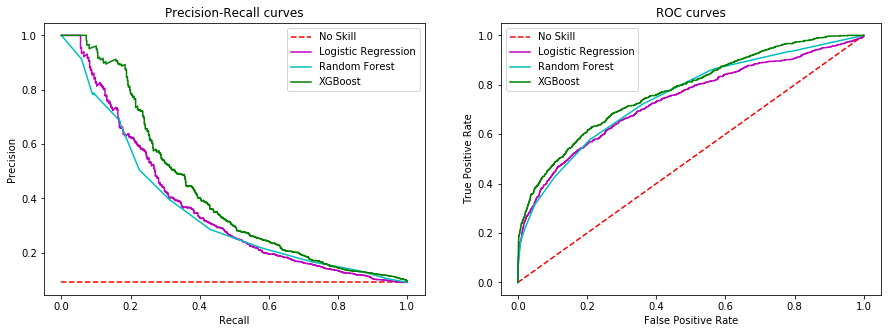

In [184]:
lrc_probs_sm_full = lrc.predict_proba(X_test_full_added_mean_std)
lrc_probs_sm_full = lrc_probs_sm_full[:,1]
lrc_precision_sm_full, lrc_recall_sm_full, lrc_threshold_sm_full = precision_recall_curve(Y_test_full_added_mean_std, lrc_probs_sm_full)
lrc_f1_sm_full, lrc_auc_sm_full = f1_score(Y_test_full_added_mean_std, lrc_y_pred_sm_full), auc(lrc_recall_sm_full, lrc_precision_sm_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_sm_full, lrc_auc_sm_full))

rfc_probs_sm_full = rfc.predict_proba(X_test_full_added_mean_std)
rfc_probs_sm_full = rfc_probs_sm_full[:,1]
rfc_precision_sm_full, rfc_recall_sm_full, rfc_threshold_sm_full = precision_recall_curve(Y_test_full_added_mean_std, rfc_probs_sm_full)
rfc_f1_sm_full, rfc_auc_sm_full = f1_score(Y_test_full_added_mean_std, rfc_y_pred_sm_full), auc(rfc_recall_sm_full, rfc_precision_sm_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_sm_full, rfc_auc_sm_full))

xgb_probs_sm_full = xgb.predict_proba(X_test_full_added_mean_std)
xgb_probs_sm_full = xgb_probs_sm_full[:,1]
xgb_precision_sm_full, xgb_recall_sm_full, xgb_threshold_sm_full = precision_recall_curve(Y_test_full_added_mean_std, xgb_probs_sm_full)
xgb_f1_sm_full, xgb_auc_sm_full = f1_score(Y_test_full_added_mean_std, xgb_y_pred_sm_full), auc(xgb_recall_sm_full, xgb_precision_sm_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_sm_full, lrc_auc_sm_full))

fig_full_sm, (ax1_full_sm, ax2_full_sm) = plt.subplots(1, 2, figsize=(15,5))

ax1_full_sm.set_title('Precision-Recall curves')
no_skill_full_sm = len(Y_test_full_added_mean_std[Y_test_full_added_mean_std==1]) / len(Y_test_full_added_mean_std)
ax1_full_sm.plot([0, 1], [no_skill_full_sm, no_skill_full_sm], linestyle='--', color = 'r', label='No Skill')
ax1_full_sm.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='m', label='Logistic Regression')
ax1_full_sm.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'c', label='Random Forest')
ax1_full_sm.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'g', label='XGBoost')

ax1_full_sm.set(xlabel='Recall', ylabel='Precision')
ax1_full_sm.legend()

lrc_fpr_sm_full, lrc_tpr_sm_full, _ = roc_curve(Y_test_full_added_mean_std, lrc_probs_sm_full)
rfc_fpr_sm_full, rfc_tpr_sm_full, _ = roc_curve(Y_test_full_added_mean_std, rfc_probs_sm_full)
xgb_fpr_sm_full, xgb_tpr_sm_full, _ = roc_curve(Y_test_full_added_mean_std, xgb_probs_sm_full)

ax2_full_sm.set_title('ROC curves')

ax2_full_sm.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_full_sm.plot(lrc_fpr_sm_full, lrc_tpr_sm_full, color='m', label='Logistic Regression')
ax2_full_sm.plot(rfc_fpr_sm_full, rfc_tpr_sm_full, color = 'c', label='Random Forest')
ax2_full_sm.plot(xgb_fpr_sm_full, xgb_tpr_sm_full, color = 'g', label='XGBoost')

ax2_full_sm.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_full_sm.legend()

pyplot.show()

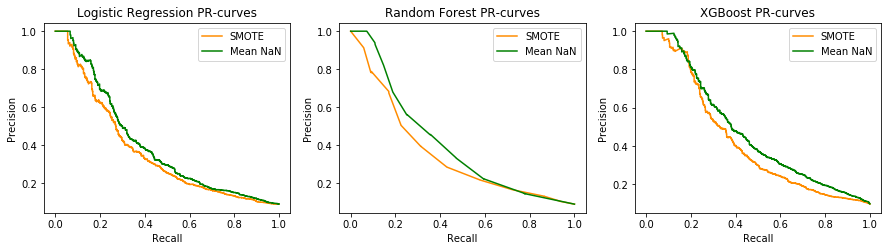

In [185]:
fig_noOutliers_mean_vs_sm, (ax1_noOutliers_mean_vs_sm, ax2_noOutliers_mean_vs_sm, ax3_noOutliers_mean_vs_sm) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_sm.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_sm.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='darkorange', label='SMOTE')
ax1_noOutliers_mean_vs_sm.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='green', label='Mean NaN')
ax1_noOutliers_mean_vs_sm.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_sm.legend()

ax2_noOutliers_mean_vs_sm.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_sm.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'darkorange', label='SMOTE')
ax2_noOutliers_mean_vs_sm.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'green', label='Mean NaN')
ax2_noOutliers_mean_vs_sm.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_sm.legend()

ax3_noOutliers_mean_vs_sm.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_sm.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'darkorange', label='SMOTE')
ax3_noOutliers_mean_vs_sm.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'green', label='Mean NaN')
ax3_noOutliers_mean_vs_sm.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_sm.legend()

### ADASYN

In [186]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_added_mean_std)
print('Before', counter)
ada = ADASYN(random_state = 100)

X_train_oversampled_ada_full, Y_train_ada_full = ada.fit_resample(X_train_full_added_mean_std, Y_train_full_added_mean_std)
X_train_ada_full = pd.DataFrame(X_train_oversampled_ada_full, columns=X_train_full_added_mean_std.columns)

counter = Counter(Y_train_ada_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28772})
Training time: 168.34053468704224sec
Current memory usage is 503.263077MB; Peak was 1200.208406MB


#### Logistic Regression

In [187]:
tracemalloc.start()

start = time.time()
lrc.fit(X_train_ada_full,Y_train_ada_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 7.518710613250732sec
Current memory usage is 0.210877MB; Peak was 3.335321MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [188]:
# predictions
lrc_y_pred_ada_full = lrc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, lrc_y_pred_ada_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, lrc_y_pred_ada_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, lrc_y_pred_ada_full))
print(classification_report(Y_test_full_added_mean_std, lrc_y_pred_ada_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, lrc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7544281376518218
Recall: 0.6736395081270428
[[5548 1634]
 [ 307  415]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      7182
           1       0.20      0.57      0.30       722

    accuracy                           0.75      7904
   macro avg       0.58      0.67      0.58      7904
weighted avg       0.88      0.75      0.80      7904

AUC: 0.7230752897941992


#### Random Forest

In [189]:
tracemalloc.start()

start = time.time()
rfc.fit(X_train_ada_full,Y_train_ada_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 19.7622127532959sec
Current memory usage is 0.163567MB; Peak was 243.598739MB


In [190]:
# predictions
rfc_y_pred_ada_full = rfc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, rfc_y_pred_ada_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, rfc_y_pred_ada_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, rfc_y_pred_ada_full))
print(classification_report(Y_test_full_added_mean_std, rfc_y_pred_ada_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, rfc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.8895495951417004
Recall: 0.6296406220228935
[[6806  376]
 [ 497  225]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7182
           1       0.37      0.31      0.34       722

    accuracy                           0.89      7904
   macro avg       0.65      0.63      0.64      7904
weighted avg       0.88      0.89      0.88      7904

AUC: 0.7471860437489538


#### XGBoost

In [191]:
tracemalloc.start()

start = time.time()
xgb.fit(X_train_ada_full,Y_train_ada_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 231.66451692581177sec
Current memory usage is 239.32582MB; Peak was 717.679951MB


In [192]:
# predictions
xgb_y_pred_ada_full = xgb.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, xgb_y_pred_ada_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, xgb_y_pred_ada_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, xgb_y_pred_ada_full))
print(classification_report(Y_test_full_added_mean_std, xgb_y_pred_ada_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, xgb.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7693572874493927
Recall: 0.7017873631447038
[[5634 1548]
 [ 275  447]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7182
           1       0.22      0.62      0.33       722

    accuracy                           0.77      7904
   macro avg       0.59      0.70      0.59      7904
weighted avg       0.89      0.77      0.81      7904

AUC: 0.7723630598503028


Logistic Regression: f1=0.300 auc=0.354
Logistic Regression: f1=0.340 auc=0.342
Logistic Regression: f1=0.329 auc=0.354


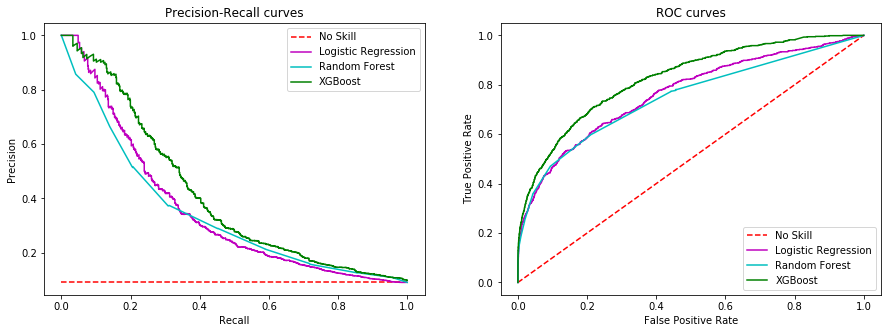

In [193]:
lrc_probs_ada_full = lrc.predict_proba(X_test_full_added_mean_std)
lrc_probs_ada_full = lrc_probs_ada_full[:,1]
lrc_precision_ada_full, lrc_recall_ada_full, lrc_threshold_ada_full = precision_recall_curve(Y_test_full_added_mean_std, lrc_probs_ada_full)
lrc_f1_ada_full, lrc_auc_ada_full = f1_score(Y_test_full_added_mean_std, lrc_y_pred_ada_full), auc(lrc_recall_ada_full, lrc_precision_ada_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_ada_full, lrc_auc_ada_full))

rfc_probs_ada_full = rfc.predict_proba(X_test_full_added_mean_std)
rfc_probs_ada_full = rfc_probs_ada_full[:,1]
rfc_precision_ada_full, rfc_recall_ada_full, rfc_threshold_ada_full = precision_recall_curve(Y_test_full_added_mean_std, rfc_probs_ada_full)
rfc_f1_ada_full, rfc_auc_ada_full = f1_score(Y_test_full_added_mean_std, rfc_y_pred_ada_full), auc(rfc_recall_ada_full, rfc_precision_ada_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_ada_full, rfc_auc_ada_full))

xgb_probs_ada_full = xgb.predict_proba(X_test_full_added_mean_std)
xgb_probs_ada_full = xgb_probs_ada_full[:,1]
xgb_precision_ada_full, xgb_recall_ada_full, xgb_threshold_ada_full = precision_recall_curve(Y_test_full_added_mean_std, xgb_probs_ada_full)
xgb_f1_ada_full, xgb_auc_ada_full = f1_score(Y_test_full_added_mean_std, xgb_y_pred_ada_full), auc(xgb_recall_ada_full, xgb_precision_ada_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_ada_full, lrc_auc_ada_full))

fig_full_ada, (ax1_full_ada, ax2_full_ada) = plt.subplots(1, 2, figsize=(15,5))

ax1_full_ada.set_title('Precision-Recall curves')
no_skill_full_ada = len(Y_test_full_added_mean_std[Y_test_full_added_mean_std==1]) / len(Y_test_full_added_mean_std)
ax1_full_ada.plot([0, 1], [no_skill_full_ada, no_skill_full_ada], linestyle='--', color = 'r', label='No Skill')
ax1_full_ada.plot(lrc_recall_ada_full, lrc_precision_ada_full, color='m', label='Logistic Regression')
ax1_full_ada.plot(rfc_recall_ada_full, rfc_precision_ada_full, color = 'c', label='Random Forest')
ax1_full_ada.plot(xgb_recall_ada_full, xgb_precision_ada_full, color = 'g', label='XGBoost')

ax1_full_ada.set(xlabel='Recall', ylabel='Precision')
ax1_full_ada.legend()

lrc_fpr_ada_full, lrc_tpr_ada_full, _ = roc_curve(Y_test_full_added_mean_std, lrc_probs_added_mean_std)
rfc_fpr_ada_full, rfc_tpr_ada_full, _ = roc_curve(Y_test_full_added_mean_std, rfc_probs_added_mean_std)
xgb_fpr_ada_full, xgb_tpr_ada_full, _ = roc_curve(Y_test_full_added_mean_std, xgb_probs_added_mean_std)

ax2_full_ada.set_title('ROC curves')

ax2_full_ada.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_full_ada.plot(lrc_fpr_ada_full, lrc_tpr_ada_full, color='m', label='Logistic Regression')
ax2_full_ada.plot(rfc_fpr_ada_full, rfc_tpr_ada_full, color = 'c', label='Random Forest')
ax2_full_ada.plot(xgb_fpr_ada_full, xgb_tpr_ada_full, color = 'g', label='XGBoost')

ax2_full_ada.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_full_ada.legend()

pyplot.show()

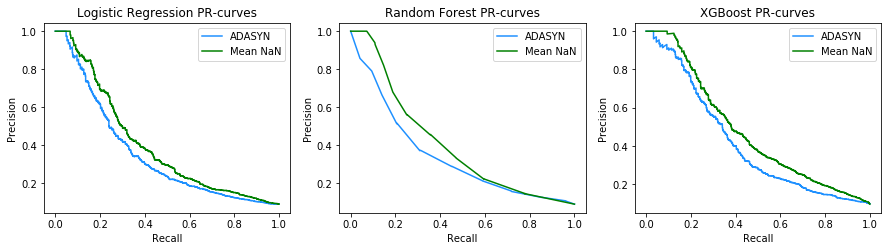

In [194]:
fig_noOutliers_mean_vs_ada, (ax1_noOutliers_mean_vs_ada, ax2_noOutliers_mean_vs_ada, ax3_noOutliers_mean_vs_ada) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_ada.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_ada.plot(lrc_recall_ada_full, lrc_precision_ada_full, color='dodgerblue', label='ADASYN')
ax1_noOutliers_mean_vs_ada.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='green', label='Mean NaN')
ax1_noOutliers_mean_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_ada.legend()

ax2_noOutliers_mean_vs_ada.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_ada.plot(rfc_recall_ada_full, rfc_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax2_noOutliers_mean_vs_ada.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'green', label='Mean NaN')
ax2_noOutliers_mean_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_ada.legend()

ax3_noOutliers_mean_vs_ada.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_ada.plot(xgb_recall_ada_full, xgb_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax3_noOutliers_mean_vs_ada.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'green', label='Mean NaN')
ax3_noOutliers_mean_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_ada.legend()


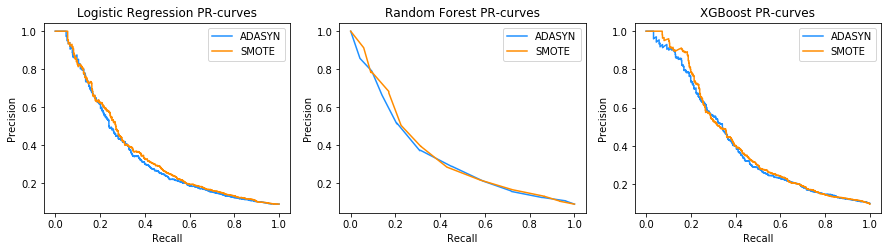

In [195]:
fig_smt_vs_ada, (ax1_smt_vs_ada, ax2_smt_vs_ada, ax3_smt_vs_ada) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_smt_vs_ada.set_title('Logistic Regression PR-curves')
ax1_smt_vs_ada.plot(lrc_recall_ada_full, lrc_precision_ada_full, color='dodgerblue', label='ADASYN')
ax1_smt_vs_ada.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='darkorange', label='SMOTE')
ax1_smt_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax1_smt_vs_ada.legend()

ax2_smt_vs_ada.set_title('Random Forest PR-curves')
ax2_smt_vs_ada.plot(rfc_recall_ada_full, rfc_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax2_smt_vs_ada.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'darkorange', label='SMOTE')
ax2_smt_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax2_smt_vs_ada.legend()

ax3_smt_vs_ada.set_title('XGBoost PR-curves')
ax3_smt_vs_ada.plot(xgb_recall_ada_full, xgb_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax3_smt_vs_ada.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'darkorange', label='SMOTE')
ax3_smt_vs_ada.set(xlabel='Recall', ylabel='Precision')
ax3_smt_vs_ada.legend()

### SMOTETomek

In [196]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_added_mean_std)
print('Before', counter)
smtom = SMOTETomek(random_state = 100)

X_train_oversampled_smtom_full, Y_train_smtom_full = smtom.fit_resample(X_train_full_added_mean_std, Y_train_full_added_mean_std)
X_train_smtom_full = pd.DataFrame(X_train_oversampled_smtom_full, columns=X_train_full_added_mean_std.columns)

counter = Counter(Y_train_smtom_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28883})
Training time: 2980.368623495102sec
Current memory usage is 504.648241MB; Peak was 1019.300797MB


#### Logistic Regression

In [197]:
tracemalloc.start()

start = time.time()
lrc.fit(X_train_smtom_full,Y_train_smtom_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 7.189992189407349sec
Current memory usage is 0.210493MB; Peak was 3.34036MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [198]:
# predictions
lrc_y_pred_smtom_full = lrc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, lrc_y_pred_smtom_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, lrc_y_pred_smtom_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, lrc_y_pred_smtom_full))
print(classification_report(Y_test_full_added_mean_std, lrc_y_pred_smtom_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, lrc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7664473684210527
Recall: 0.6802532647407993
[[5643 1539]
 [ 307  415]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7182
           1       0.21      0.57      0.31       722

    accuracy                           0.77      7904
   macro avg       0.58      0.68      0.58      7904
weighted avg       0.88      0.77      0.81      7904

AUC: 0.7310181617478599


#### Random Forest

In [199]:
tracemalloc.start()

start = time.time()
rfc.fit(X_train_smtom_full,Y_train_smtom_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 16.554553985595703sec
Current memory usage is 0.163773MB; Peak was 244.067474MB


In [200]:
# predictions
rfc_y_pred_smtom_full = rfc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, rfc_y_pred_smtom_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, rfc_y_pred_smtom_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, rfc_y_pred_smtom_full))
print(classification_report(Y_test_full_added_mean_std, rfc_y_pred_smtom_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, rfc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.8900556680161943
Recall: 0.625558779990913
[[6817  365]
 [ 504  218]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7182
           1       0.37      0.30      0.33       722

    accuracy                           0.89      7904
   macro avg       0.65      0.63      0.64      7904
weighted avg       0.88      0.89      0.88      7904

AUC: 0.743358858827586


#### XGBoost

In [201]:
tracemalloc.start()

start = time.time()
xgb.fit(X_train_smtom_full,Y_train_smtom_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 240.53481125831604sec
Current memory usage is 239.786936MB; Peak was 719.061547MB


In [202]:
# predictions
xgb_y_pred_smtom_full = xgb.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, xgb_y_pred_smtom_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, xgb_y_pred_smtom_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, xgb_y_pred_smtom_full))
print(classification_report(Y_test_full_added_mean_std, xgb_y_pred_smtom_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, xgb.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.7941548582995951
Recall: 0.7023516393322488
[[5851 1331]
 [ 296  426]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7182
           1       0.24      0.59      0.34       722

    accuracy                           0.79      7904
   macro avg       0.60      0.70      0.61      7904
weighted avg       0.89      0.79      0.83      7904

AUC: 0.7776037315511


Logistic Regression: f1=0.310 auc=0.368
Logistic Regression: f1=0.334 auc=0.346
Logistic Regression: f1=0.344 auc=0.368


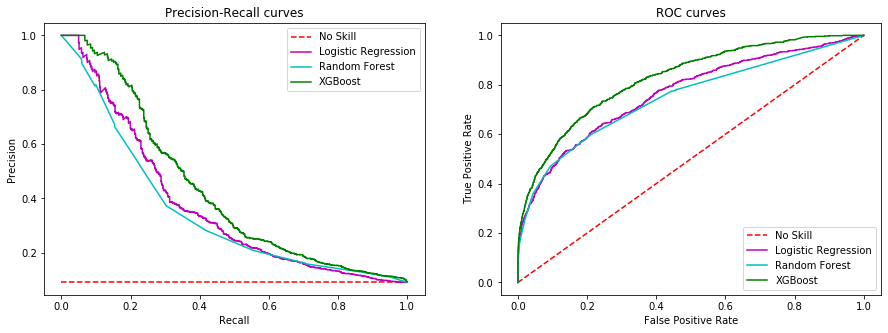

In [203]:
lrc_probs_smtom_full = lrc.predict_proba(X_test_full_added_mean_std)
lrc_probs_smtom_full = lrc_probs_smtom_full[:,1]
lrc_precision_smtom_full, lrc_recall_smtom_full, lrc_threshold_smtom_full = precision_recall_curve(Y_test_full_added_mean_std, lrc_probs_smtom_full)
lrc_f1_smtom_full, lrc_auc_smtom_full = f1_score(Y_test_full_added_mean_std, lrc_y_pred_smtom_full), auc(lrc_recall_smtom_full, lrc_precision_smtom_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_smtom_full, lrc_auc_smtom_full))

rfc_probs_smtom_full = rfc.predict_proba(X_test_full_added_mean_std)
rfc_probs_smtom_full = rfc_probs_smtom_full[:,1]
rfc_precision_smtom_full, rfc_recall_smtom_full, rfc_threshold_smtom_full = precision_recall_curve(Y_test_full_added_mean_std, rfc_probs_smtom_full)
rfc_f1_smtom_full, rfc_auc_smtom_full = f1_score(Y_test_full_added_mean_std, rfc_y_pred_smtom_full), auc(rfc_recall_smtom_full, rfc_precision_smtom_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_smtom_full, rfc_auc_smtom_full))

xgb_probs_smtom_full = xgb.predict_proba(X_test_full_added_mean_std)
xgb_probs_smtom_full = xgb_probs_smtom_full[:,1]
xgb_precision_smtom_full, xgb_recall_smtom_full, xgb_threshold_smtom_full = precision_recall_curve(Y_test_full_added_mean_std, xgb_probs_smtom_full)
xgb_f1_smtom_full, xgb_auc_smtom_full = f1_score(Y_test_full_added_mean_std, xgb_y_pred_smtom_full), auc(xgb_recall_smtom_full, xgb_precision_smtom_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_smtom_full, lrc_auc_smtom_full))

fig_full_smtom, (ax1_full_smtom, ax2_full_smtom) = plt.subplots(1, 2, figsize=(15,5))

ax1_full_smtom.set_title('Precision-Recall curves')
no_skill_full_smtom = len(Y_test_full_added_mean_std[Y_test_full_added_mean_std==1]) / len(Y_test_full_added_mean_std)
ax1_full_smtom.plot([0, 1], [no_skill_full_smtom, no_skill_full_smtom], linestyle='--', color = 'r', label='No Skill')
ax1_full_smtom.plot(lrc_recall_smtom_full, lrc_precision_smtom_full, color='m', label='Logistic Regression')
ax1_full_smtom.plot(rfc_recall_smtom_full, rfc_precision_smtom_full, color = 'c', label='Random Forest')
ax1_full_smtom.plot(xgb_recall_smtom_full, xgb_precision_smtom_full, color = 'g', label='XGBoost')

ax1_full_smtom.set(xlabel='Recall', ylabel='Precision')
ax1_full_smtom.legend()

lrc_fpr_smtom_full, lrc_tpr_smtom_full, _ = roc_curve(Y_test_full_added_mean_std, lrc_probs_added_mean_std)
rfc_fpr_smtom_full, rfc_tpr_smtom_full, _ = roc_curve(Y_test_full_added_mean_std, rfc_probs_added_mean_std)
xgb_fpr_smtom_full, xgb_tpr_smtom_full, _ = roc_curve(Y_test_full_added_mean_std, xgb_probs_added_mean_std)

ax2_full_smtom.set_title('ROC curves')

ax2_full_smtom.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_full_smtom.plot(lrc_fpr_smtom_full, lrc_tpr_smtom_full, color='m', label='Logistic Regression')
ax2_full_smtom.plot(rfc_fpr_smtom_full, rfc_tpr_smtom_full, color = 'c', label='Random Forest')
ax2_full_smtom.plot(xgb_fpr_smtom_full, xgb_tpr_smtom_full, color = 'g', label='XGBoost')

ax2_full_smtom.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_full_smtom.legend()

pyplot.show()

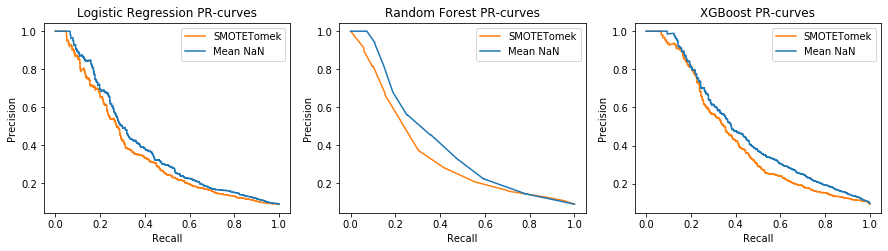

In [204]:
fig_noOutliers_mean_vs_smtom, (ax1_noOutliers_mean_vs_smtom, ax2_noOutliers_mean_vs_smtom, ax3_noOutliers_mean_vs_smtom) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_smtom.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_smtom.plot(lrc_recall_smtom_full, lrc_precision_smtom_full, color='tab:orange', label='SMOTETomek')
ax1_noOutliers_mean_vs_smtom.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='tab:blue', label='Mean NaN')
ax1_noOutliers_mean_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_smtom.legend()

ax2_noOutliers_mean_vs_smtom.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_smtom.plot(rfc_recall_smtom_full, rfc_precision_smtom_full, color = 'tab:orange', label='SMOTETomek')
ax2_noOutliers_mean_vs_smtom.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax2_noOutliers_mean_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_smtom.legend()

ax3_noOutliers_mean_vs_smtom.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_smtom.plot(xgb_recall_smtom_full, xgb_precision_smtom_full, color = 'tab:orange', label='SMOTETomek')
ax3_noOutliers_mean_vs_smtom.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax3_noOutliers_mean_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_smtom.legend()

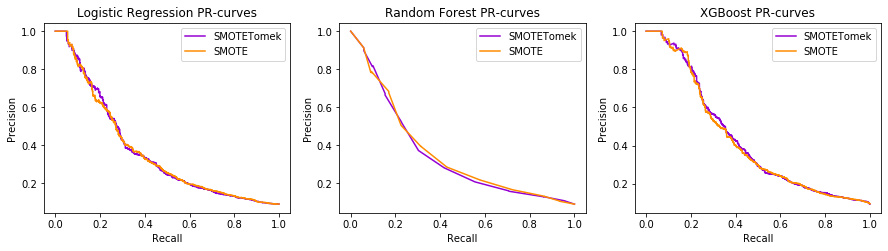

In [205]:
fig_smt_vs_smtom, (ax1_smt_vs_smtom, ax2_smt_vs_smtom, ax3_smt_vs_smtom) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_smt_vs_smtom.set_title('Logistic Regression PR-curves')
ax1_smt_vs_smtom.plot(lrc_recall_smtom_full, lrc_precision_smtom_full, color='darkviolet', label='SMOTETomek')
ax1_smt_vs_smtom.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='darkorange', label='SMOTE')
ax1_smt_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax1_smt_vs_smtom.legend()

ax2_smt_vs_smtom.set_title('Random Forest PR-curves')
ax2_smt_vs_smtom.plot(rfc_recall_smtom_full, rfc_precision_smtom_full, color = 'darkviolet', label='SMOTETomek')
ax2_smt_vs_smtom.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'darkorange', label='SMOTE')
ax2_smt_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax2_smt_vs_smtom.legend()

ax3_smt_vs_smtom.set_title('XGBoost PR-curves')
ax3_smt_vs_smtom.plot(xgb_recall_smtom_full, xgb_precision_smtom_full, color = 'darkviolet', label='SMOTETomek')
ax3_smt_vs_smtom.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'darkorange', label='SMOTE')
ax3_smt_vs_smtom.set(xlabel='Recall', ylabel='Precision')
ax3_smt_vs_smtom.legend()

### SMOTEEN

In [206]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_added_mean_std)
print('Before', counter)
smenn = SMOTEENN()

X_train_oversampled_smenn_full, Y_train_smenn_full = smenn.fit_resample(X_train_full_added_mean_std, Y_train_full_added_mean_std)
X_train_smenn_full = pd.DataFrame(X_train_oversampled_smenn_full, columns=X_train_full_added_mean_std.columns)

counter = Counter(Y_train_smenn_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({1: 28657, 0: 15353})
Training time: 3395.2478675842285sec
Current memory usage is 903.646106MB; Peak was 1145.203895MB


#### Logistic Regression

In [207]:
tracemalloc.start()

start = time.time()
lrc.fit(X_train_smenn_full,Y_train_smenn_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 5.490867614746094sec
Current memory usage is 0.21055MB; Peak was 2.666294MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [208]:
# predictions
lrc_y_pred_smenn_full = lrc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, lrc_y_pred_smenn_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, lrc_y_pred_smenn_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, lrc_y_pred_smenn_full))
print(classification_report(Y_test_full_added_mean_std, lrc_y_pred_smenn_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, lrc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.6120951417004049
Recall: 0.6787876123056178
[[4289 2893]
 [ 173  549]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      7182
           1       0.16      0.76      0.26       722

    accuracy                           0.61      7904
   macro avg       0.56      0.68      0.50      7904
weighted avg       0.89      0.61      0.69      7904

AUC: 0.7527622727178056


#### Random Forest

In [209]:
tracemalloc.start()

start = time.time()
rfc.fit(X_train_smenn_full,Y_train_smenn_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 11.967220306396484sec
Current memory usage is 0.16353MB; Peak was 186.003155MB


In [210]:
# predictions
rfc_y_pred_smenn_full = rfc.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, rfc_y_pred_smenn_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, rfc_y_pred_smenn_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, rfc_y_pred_smenn_full))
print(classification_report(Y_test_full_added_mean_std, rfc_y_pred_smenn_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, rfc.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.75290991902834
Recall: 0.6615918451098506
[[5554 1628]
 [ 325  397]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7182
           1       0.20      0.55      0.29       722

    accuracy                           0.75      7904
   macro avg       0.57      0.66      0.57      7904
weighted avg       0.88      0.75      0.80      7904

AUC: 0.7286188308567664


#### XGBoost

In [211]:
tracemalloc.start()

start = time.time()
xgb.fit(X_train_smenn_full,Y_train_smenn_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 197.0261251926422sec
Current memory usage is 182.726663MB; Peak was 547.881499MB


In [212]:
# predictions
xgb_y_pred_smenn_full = xgb.predict(X_test_full_added_mean_std)
print(f"Accuracy: {accuracy_score(Y_test_full_added_mean_std, xgb_y_pred_smenn_full)}")
print(f"Recall: {recall_score(Y_test_full_added_mean_std, xgb_y_pred_smenn_full, average='macro')}")
print(confusion_matrix(Y_test_full_added_mean_std, xgb_y_pred_smenn_full))
print(classification_report(Y_test_full_added_mean_std, xgb_y_pred_smenn_full))
print(f"AUC: {roc_auc_score(Y_test_full_added_mean_std, xgb.predict_proba(X_test_full_added_mean_std)[:,1])}")

Accuracy: 0.5468117408906883
Recall: 0.6752553899368304
[[3721 3461]
 [ 121  601]]
              precision    recall  f1-score   support

           0       0.97      0.52      0.68      7182
           1       0.15      0.83      0.25       722

    accuracy                           0.55      7904
   macro avg       0.56      0.68      0.46      7904
weighted avg       0.89      0.55      0.64      7904

AUC: 0.7849248583138363


Logistic Regression: f1=0.264 auc=0.377
Logistic Regression: f1=0.289 auc=0.271
Logistic Regression: f1=0.251 auc=0.377


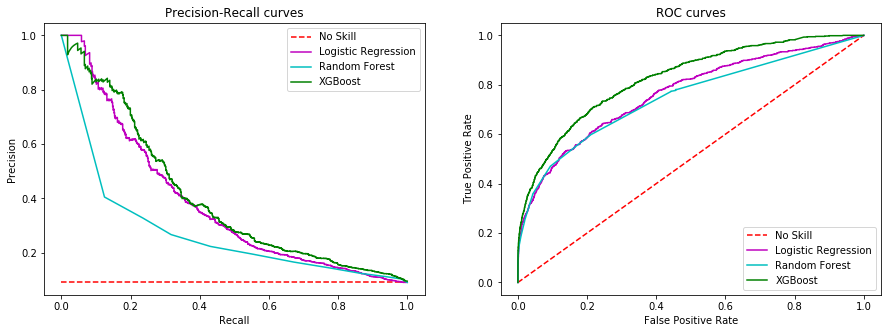

In [213]:
lrc_probs_smenn_full = lrc.predict_proba(X_test_full_added_mean_std)
lrc_probs_smenn_full = lrc_probs_smenn_full[:,1]
lrc_precision_smenn_full, lrc_recall_smenn_full, lrc_threshold_smenn_full = precision_recall_curve(Y_test_full_added_mean_std, lrc_probs_smenn_full)
lrc_f1_smenn_full, lrc_auc_smenn_full = f1_score(Y_test_full_added_mean_std, lrc_y_pred_smenn_full), auc(lrc_recall_smenn_full, lrc_precision_smenn_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (lrc_f1_smenn_full, lrc_auc_smenn_full))

rfc_probs_smenn_full = rfc.predict_proba(X_test_full_added_mean_std)
rfc_probs_smenn_full = rfc_probs_smenn_full[:,1]
rfc_precision_smenn_full, rfc_recall_smenn_full, rfc_threshold_smenn_full = precision_recall_curve(Y_test_full_added_mean_std, rfc_probs_smenn_full)
rfc_f1_smenn_full, rfc_auc_smenn_full = f1_score(Y_test_full_added_mean_std, rfc_y_pred_smenn_full), auc(rfc_recall_smenn_full, rfc_precision_smenn_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (rfc_f1_smenn_full, rfc_auc_smenn_full))

xgb_probs_smenn_full = xgb.predict_proba(X_test_full_added_mean_std)
xgb_probs_smenn_full = xgb_probs_smenn_full[:,1]
xgb_precision_smenn_full, xgb_recall_smenn_full, xgb_threshold_smenn_full = precision_recall_curve(Y_test_full_added_mean_std, xgb_probs_smenn_full)
xgb_f1_smenn_full, xgb_auc_smenn_full = f1_score(Y_test_full_added_mean_std, xgb_y_pred_smenn_full), auc(xgb_recall_smenn_full, xgb_precision_smenn_full)
print('Logistic Regression: f1=%.3f auc=%.3f' % (xgb_f1_smenn_full, lrc_auc_smenn_full))

fig_full_smenn, (ax1_full_smenn, ax2_full_smenn) = plt.subplots(1, 2, figsize=(15,5))

ax1_full_smenn.set_title('Precision-Recall curves')
no_skill_full_smenn = len(Y_test_full_added_mean_std[Y_test_full_added_mean_std==1]) / len(Y_test_full_added_mean_std)
ax1_full_smenn.plot([0, 1], [no_skill_full_smenn, no_skill_full_smenn], linestyle='--', color = 'r', label='No Skill')
ax1_full_smenn.plot(lrc_recall_smenn_full, lrc_precision_smenn_full, color='m', label='Logistic Regression')
ax1_full_smenn.plot(rfc_recall_smenn_full, rfc_precision_smenn_full, color = 'c', label='Random Forest')
ax1_full_smenn.plot(xgb_recall_smenn_full, xgb_precision_smenn_full, color = 'g', label='XGBoost')

ax1_full_smenn.set(xlabel='Recall', ylabel='Precision')
ax1_full_smenn.legend()

lrc_fpr_smenn_full, lrc_tpr_smenn_full, _ = roc_curve(Y_test_full_added_mean_std, lrc_probs_added_mean_std)
rfc_fpr_smenn_full, rfc_tpr_smenn_full, _ = roc_curve(Y_test_full_added_mean_std, rfc_probs_added_mean_std)
xgb_fpr_smenn_full, xgb_tpr_smenn_full, _ = roc_curve(Y_test_full_added_mean_std, xgb_probs_added_mean_std)

ax2_full_smenn.set_title('ROC curves')

ax2_full_smenn.plot([0, 1], [0, 1], linestyle='--', color='r', label='No Skill')
ax2_full_smenn.plot(lrc_fpr_smenn_full, lrc_tpr_smenn_full, color='m', label='Logistic Regression')
ax2_full_smenn.plot(rfc_fpr_smenn_full, rfc_tpr_smenn_full, color = 'c', label='Random Forest')
ax2_full_smenn.plot(xgb_fpr_smenn_full, xgb_tpr_smenn_full, color = 'g', label='XGBoost')

ax2_full_smenn.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2_full_smenn.legend()

pyplot.show()

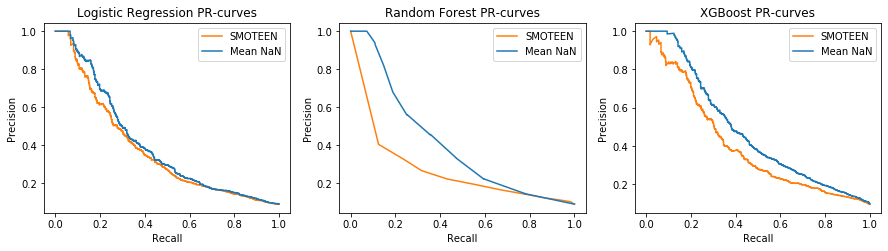

In [214]:
fig_noOutliers_mean_vs_smenn, (ax1_noOutliers_mean_vs_smenn, ax2_noOutliers_mean_vs_smenn, ax3_noOutliers_mean_vs_smenn) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_noOutliers_mean_vs_smenn.set_title('Logistic Regression PR-curves')
ax1_noOutliers_mean_vs_smenn.plot(lrc_recall_smenn_full, lrc_precision_smenn_full, color='tab:orange', label='SMOTEEN')
ax1_noOutliers_mean_vs_smenn.plot(lrc_recall_added_mean_std, lrc_precision_added_mean_std, color='tab:blue', label='Mean NaN')
ax1_noOutliers_mean_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax1_noOutliers_mean_vs_smenn.legend()

ax2_noOutliers_mean_vs_smenn.set_title('Random Forest PR-curves')
ax2_noOutliers_mean_vs_smenn.plot(rfc_recall_smenn_full, rfc_precision_smenn_full, color = 'tab:orange', label='SMOTEEN')
ax2_noOutliers_mean_vs_smenn.plot(rfc_recall_added_mean_std, rfc_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax2_noOutliers_mean_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax2_noOutliers_mean_vs_smenn.legend()

ax3_noOutliers_mean_vs_smenn.set_title('XGBoost PR-curves')
ax3_noOutliers_mean_vs_smenn.plot(xgb_recall_smenn_full, xgb_precision_smenn_full, color = 'tab:orange', label='SMOTEEN')
ax3_noOutliers_mean_vs_smenn.plot(xgb_recall_added_mean_std, xgb_precision_added_mean_std, color = 'tab:blue', label='Mean NaN')
ax3_noOutliers_mean_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax3_noOutliers_mean_vs_smenn.legend()

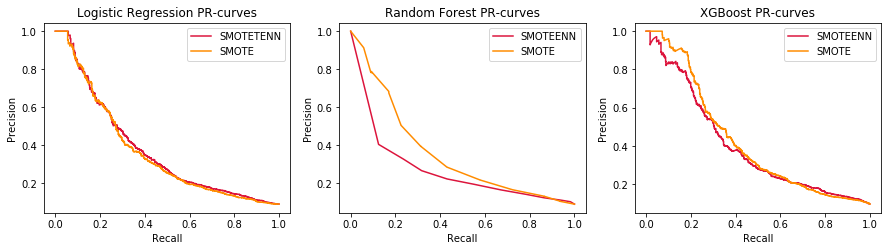

In [215]:
fig_smt_vs_smenn, (ax1_smt_vs_smenn, ax2_smt_vs_smenn, ax3_smt_vs_smenn) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_smt_vs_smenn.set_title('Logistic Regression PR-curves')
ax1_smt_vs_smenn.plot(lrc_recall_smenn_full, lrc_precision_smenn_full, color='crimson', label='SMOTETENN')
ax1_smt_vs_smenn.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='darkorange', label='SMOTE')
ax1_smt_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax1_smt_vs_smenn.legend()

ax2_smt_vs_smenn.set_title('Random Forest PR-curves')
ax2_smt_vs_smenn.plot(rfc_recall_smenn_full, rfc_precision_smenn_full, color = 'crimson', label='SMOTEENN')
ax2_smt_vs_smenn.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'darkorange', label='SMOTE')
ax2_smt_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax2_smt_vs_smenn.legend()

ax3_smt_vs_smenn.set_title('XGBoost PR-curves')
ax3_smt_vs_smenn.plot(xgb_recall_smenn_full, xgb_precision_smenn_full, color = 'crimson', label='SMOTEENN')
ax3_smt_vs_smenn.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'darkorange', label='SMOTE')
ax3_smt_vs_smenn.set(xlabel='Recall', ylabel='Precision')
ax3_smt_vs_smenn.legend()

# Oversampling összehasonlítás

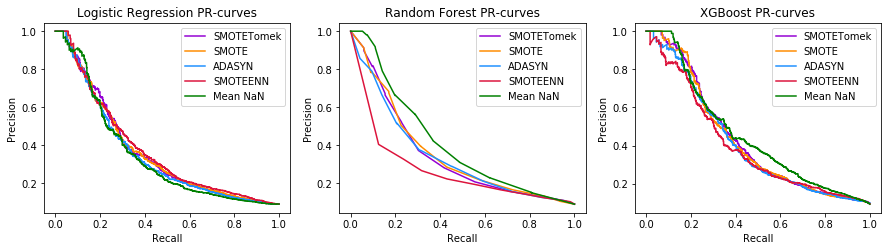

In [216]:
fig_oversampling_all, (ax1_oversampling_all, ax2_oversampling_all, ax3_oversampling_all) = plt.subplots(1, 3, figsize=(15,3.5))

ax1_oversampling_all.set_title('Logistic Regression PR-curves')
ax1_oversampling_all.plot(lrc_recall_smtom_full, lrc_precision_smtom_full, color='darkviolet', label='SMOTETomek')
ax1_oversampling_all.plot(lrc_recall_sm_full, lrc_precision_sm_full, color='darkorange', label='SMOTE')
ax1_oversampling_all.plot(lrc_recall_ada_full, lrc_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax1_oversampling_all.plot(lrc_recall_smenn_full, lrc_precision_smenn_full, color = 'crimson', label='SMOTEENN')
ax1_oversampling_all.plot(lrc_recall_mean_noOutliers, lrc_precision_mean_noOutliers, color='green', label='Mean NaN')
ax1_oversampling_all.set(xlabel='Recall', ylabel='Precision')
ax1_oversampling_all.legend()

ax2_oversampling_all.set_title('Random Forest PR-curves')
ax2_oversampling_all.plot(rfc_recall_smtom_full, rfc_precision_smtom_full, color = 'darkviolet', label='SMOTETomek')
ax2_oversampling_all.plot(rfc_recall_sm_full, rfc_precision_sm_full, color = 'darkorange', label='SMOTE')
ax2_oversampling_all.plot(rfc_recall_ada_full, rfc_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax2_oversampling_all.plot(rfc_recall_smenn_full, rfc_precision_smenn_full, color = 'crimson', label='SMOTEENN')
ax2_oversampling_all.plot(rfc_recall_mean_noOutliers, rfc_precision_mean_noOutliers, color='green', label='Mean NaN')
ax2_oversampling_all.set(xlabel='Recall', ylabel='Precision')
ax2_oversampling_all.legend()

ax3_oversampling_all.set_title('XGBoost PR-curves')
ax3_oversampling_all.plot(xgb_recall_smtom_full, xgb_precision_smtom_full, color = 'darkviolet', label='SMOTETomek')
ax3_oversampling_all.plot(xgb_recall_sm_full, xgb_precision_sm_full, color = 'darkorange', label='SMOTE')
ax3_oversampling_all.plot(xgb_recall_ada_full, xgb_precision_ada_full, color = 'dodgerblue', label='ADASYN')
ax3_oversampling_all.plot(xgb_recall_smenn_full, xgb_precision_smenn_full, color = 'crimson', label='SMOTEENN')
ax3_oversampling_all.plot(xgb_recall_mean_noOutliers, xgb_precision_mean_noOutliers, color='green', label='Mean NaN')
ax3_oversampling_all.set(xlabel='Recall', ylabel='Precision')
ax3_oversampling_all.legend()